In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

data = pd.read_excel(r'GDM_data.xlsx')
#print(data)  #(2065,117)

In [3]:
data.describe()

,NO,PREGAGE,G,P,A,FERTILIT,TOTALWEE,FAMIHIS,IFAC,AC1HBV,...,RETINALH,CEPHALHE,INFECTI1,ANEMIA,WETLUNG,AFAS,SCLEREDE,CHROMOSO,ISCHEENC,MYOCARDI
count,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,...,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000,2065.000000
mean,1158.977240,29.887167,1.677966,0.169492,0.506538,1.159806,38.771719,1.261017,1.210654,1.065860,...,1.005811,1.013559,1.017433,1.041162,1.006295,1.004358,1.007264,1.002906,1.000484,1.004358
std,652.825016,3.925710,0.956123,0.403880,0.808195,0.366515,1.384841,0.694773,0.407872,0.248097,...,0.076027,0.115680,0.130911,0.198713,0.079113,0.065890,0.084939,0.053838,0.022006,0.065890
min,1.000000,18.000000,1.000000,0.000000,0.000000,1.000000,27.500000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,598.000000,27.000000,1.000000,0.000000,0.000000,1.000000,38.200000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1172.000000,29.000000,1.000000,0.000000,0.000000,1.000000,39.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1723.000000,32.000000,2.000000,0.000000,1.000000,1.000000,39.600000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2271.000000,44.000000,7.000000,3.000000,6.000000,2.000000,41.500000,4.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [4]:
data.columns

Index(['ENTRYBY', 'NO', 'PNAME', 'PREGAGE', 'LMP', 'G', 'P', 'A', 'FERTILIT',
       'EXPDATE',
       ...
       'RETINALH', 'CEPHALHE', 'INFECTI1', 'ANEMIA', 'WETLUNG', 'AFAS',
       'SCLEREDE', 'CHROMOSO', 'ISCHEENC', 'MYOCARDI'],
      dtype='object', length=117)

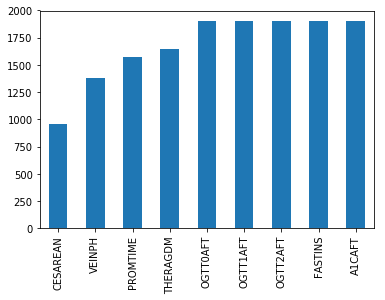

In [5]:
#可视化
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
data.isnull().sum()

ENTRYBY     0
NO          0
PNAME       0
PREGAGE     0
LMP         0
           ..
AFAS        0
SCLEREDE    0
CHROMOSO    0
ISCHEENC    0
MYOCARDI    0
Length: 117, dtype: int64

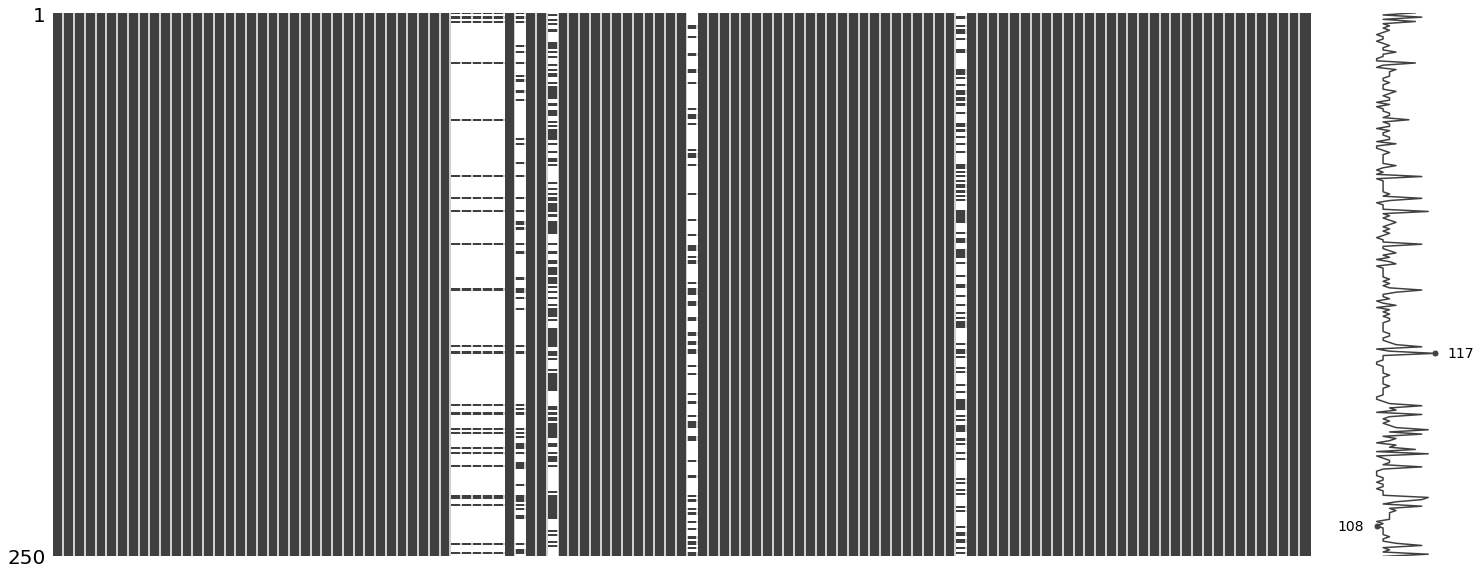

In [7]:
#可视化看下缺失值
msno.matrix(data.sample(250))

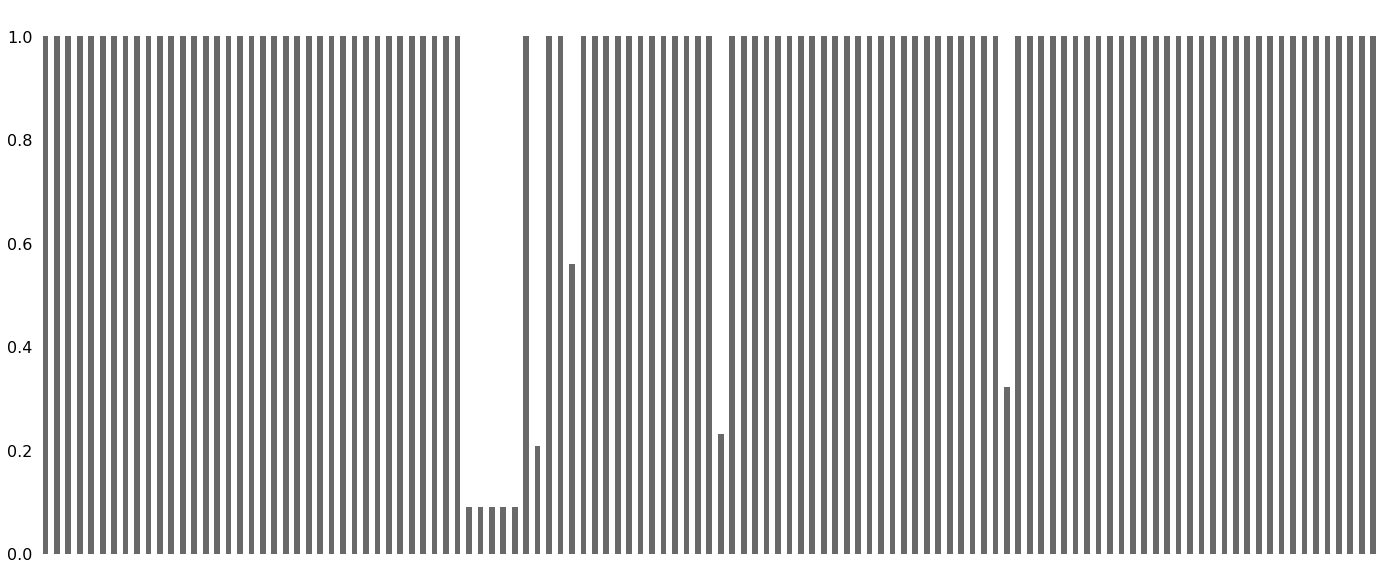

In [8]:
msno.bar(data.sample(1000))

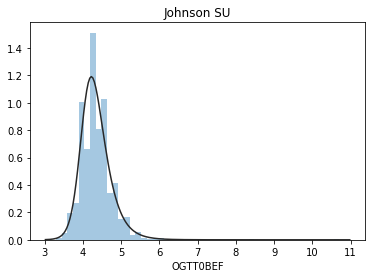

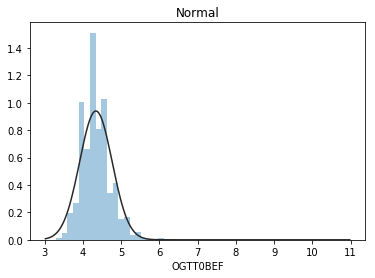

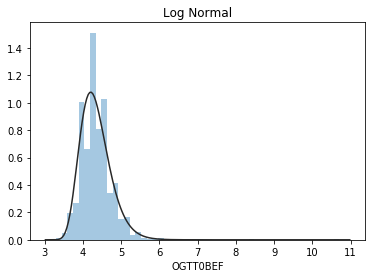

In [12]:
# 总体分布概况（无界约翰逊分布等）

import scipy.stats as st
y = data['OGTT0BEF']
plt.figure(1)
plt.title('Johnson SU')
#fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系
sns.distplot(y,kde=False,fit=st.johnsonsu)  #distplot画出分布线下的直方图，kde是否显示核密度估计
plt.figure(2)
plt.title('Normal')
sns.distplot(y,kde = False,fit = st.norm)   #正态分布
plt.figure(3)
plt.title('Log Normal')
sns.distplot(y,kde = False,fit = st.lognorm)


Skewness: 2.786262
Kurtosis: 30.003673


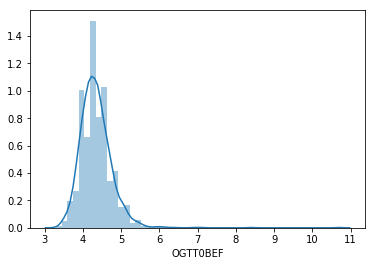

In [23]:
#查看skewness and kurtosi

sns.distplot(data['OGTT0BEF'])
print('Skewness: %f'% data['OGTT0BEF'].skew()) #偏度（skewness），是统计数据分布偏斜方向和程度的度量,右偏分布>0,左偏分布<0
print('Kurtosis: %f'% data['OGTT0BEF'].kurt()) #峰度（peakedness；kurtosis）又称峰态系数。表征概率密度分布曲线在平均值处峰值高低的特征数。
#峰度包括正态分布（峰度值=3），厚尾（峰度值>3），瘦尾（峰度值<3）。注意，个别的软件会将峰度值减3

In [24]:
###################################2021.6.16改进########################
import copy
#print(data.shape)   #2065,117
attri_del = ['PREGAGE','G','P','A','TOTALWEE','FAMIHIS','AC2NEPHR','AC3THALA','AC4OBESI','AC5G6PD','BWBEF','BMIBEFDE',
               'SBPBEFDE','DBPBEFDE','HB','PRONURIA','FPGBEF','OGTT0BEF','OGTT1BEF','OGTT2BEF','A1C','weight_change']
label_del = ['PIH','PREECLAM','PREMATUR','DISTRESS','LGA','IFLBW','HYPERBIL','PDA',
            'ASPHYXIA']#'ASD','VSD','ABRUPTIO']

###########孕期体重变化（新建该特征：孕期体重变化=临产体重-孕前体重）####################
data['weight_change'] = data['BWBEFDEL'] - data['BWBEF']
data_attribute_initial = copy.deepcopy(data[attri_del])
data_label = copy.deepcopy(data[label_del])

#########根据末次月经时间新建一个特征，春/夏/秋/冬#######################
#########根据分娩日期新建一个特征，春/夏/秋/冬###########################
def data_change_LMP_REALDATE(data1 = copy.deepcopy(data['LMP']),data2 = copy.deepcopy(data['REALDATE'])):
    for i in range(len(data1)):      #将末次月经时间新建一个特征，春/夏/秋/冬=1，2，3，4
        if 1<=data1[i].month and data1[i].month<=3:
            data1[i] = 1
        elif 4<=data1[i].month and data1[i].month<=6:
            data1[i] = 2
        elif 7<=data1[i].month and data1[i].month<=9:
            data1[i] = 3
        else:
            data1[i] = 4
    for i in range(len(data2)):      #将分娩日期新建一个特征，春/夏/秋/冬=1，2，3，4
        if 1<=data2[i].month and data2[i].month<=3:
            data2[i] = 1
        elif 4<=data2[i].month and data2[i].month<=6:
            data2[i] = 2
        elif 7<=data2[i].month and data2[i].month<=9:
            data2[i] = 3
        else:
            data2[i] = 4
    return data1,data2


#列名其实没变cancat后还是LMP和REALDATE
new_LMP,new_REALDATE = data_change_LMP_REALDATE()
#weight_change = data_change_weight()
data_attribute = pd.concat([data_attribute_initial,new_LMP,new_REALDATE],axis = 1)   
#print(data_attribute.shape)  #(2065,24),24个属性
#print(data_label.shape)    #(2065,12),12个标签

#print(data['LMP'])
#print(data['LMP'].value_counts())   1:812  2:154   3:636   4:782
#所有属性列
#ft_list = data_attribute.columns.tolist()
#len(ft_list)
#print(ft_list)
#ft_list2 = data_label.columns.tolist()
#print(ft_list2)

#以妊高症或先兆子痫作为预测变量时，不纳入该特征） SBPBEFDE，DBPBEFDE
data_attribute2 = copy.deepcopy(data_attribute.drop(['SBPBEFDE','DBPBEFDE'],axis=1))
#以早产作为预测变量时，不纳入该特征）   TOTALWEE
data_attribute3 = copy.deepcopy(data_attribute.drop(['TOTALWEE'],axis=1))

In [49]:
#数据分离训练集，验证集
def data_separate(initial_data2,y):
    train_X,test_X,train_y,test_y = train_test_split(initial_data2,
                                                    y,
                                                    test_size = 0.3)
                                                    #random_state = 1)
    train_X.shape,test_X.shape,train_y.shape,test_y.shape

    X_train = train_X.astype(np.int64)
    y_train = train_y
    test_X = test_X.astype(np.int64)

    #因为取训练集，验证集时打乱了顺序，所以重新排序
    X = X_train.sort_index()
    y = y_train.sort_index()
    test_X = test_X.sort_index()
    y_test = test_y.sort_index()

    
    #将y中二分类的负例的2变成0，方便AUC的计算
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)
    '''
    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
                #print(y_test_roc[i][index])
    #print(y_test_roc[calRoc])
    '''
    return (X_train,y_train,test_X,y_test)  


#将y中二分类的负例的2变成0，方便AUC的计算
def y_2change_0(data_label):
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)

    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
    return y_roc
#print(y_roc[calRoc])


In [27]:
print(data_attribute.columns)
print(data_attribute2.columns)
print(data_attribute3.columns)

Index(['PREGAGE', 'G', 'P', 'A', 'TOTALWEE', 'FAMIHIS', 'AC2NEPHR', 'AC3THALA',
       'AC4OBESI', 'AC5G6PD', 'BWBEF', 'BMIBEFDE', 'SBPBEFDE', 'DBPBEFDE',
       'HB', 'PRONURIA', 'FPGBEF', 'OGTT0BEF', 'OGTT1BEF', 'OGTT2BEF', 'A1C',
       'weight_change', 'LMP', 'REALDATE'],
      dtype='object')
Index(['PREGAGE', 'G', 'P', 'A', 'TOTALWEE', 'FAMIHIS', 'AC2NEPHR', 'AC3THALA',
       'AC4OBESI', 'AC5G6PD', 'BWBEF', 'BMIBEFDE', 'HB', 'PRONURIA', 'FPGBEF',
       'OGTT0BEF', 'OGTT1BEF', 'OGTT2BEF', 'A1C', 'weight_change', 'LMP',
       'REALDATE'],
      dtype='object')
Index(['PREGAGE', 'G', 'P', 'A', 'FAMIHIS', 'AC2NEPHR', 'AC3THALA', 'AC4OBESI',
       'AC5G6PD', 'BWBEF', 'BMIBEFDE', 'SBPBEFDE', 'DBPBEFDE', 'HB',
       'PRONURIA', 'FPGBEF', 'OGTT0BEF', 'OGTT1BEF', 'OGTT2BEF', 'A1C',
       'weight_change', 'LMP', 'REALDATE'],
      dtype='object')


In [28]:
#分离二类标签和多类标签
calRoc=[]
calOther=[]
#y_tag = ['PREECLAM','PIH','PREMATUR','ABRUPTIO','POLYHYDR','DISTRESS','FGR','LGA','SGA','MACROSOM','IFLBW','BABYBW','BABYH','HYPERBIL','PFO','ASD','VSD','PDA','ASPHYXIA','PATHOGLY']
y_tag = ['PIH','PREECLAM','PREMATUR','DISTRESS','LGA','IFLBW','HYPERBIL','PDA',
            'ASPHYXIA']#'ASD','VSD','ABRUPTIO']
for cat_fea in y_tag:
    if data_label[cat_fea].nunique()==2:
        calRoc.append(cat_fea)
    else:
        calOther.append(cat_fea)
#print('需要计算ROC指标的标签有{num1}个'.format(num1=len(calRoc)))  #8个需要ROC的二分类标签
#print('需要编码处理的多分类标签有{num1}个'.format(num1=len(calOther))) #4个多分类的标签
#print(calRoc,calOther)

In [29]:
#特征nunique分布,标签
for cat_fea in data_label[calRoc].columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,data_label[cat_fea].nunique()))
    print(data_label[cat_fea].value_counts())


PIH的特征分布如下：
PIH特征有个2不同的值
1    2025
2      40
Name: PIH, dtype: int64
PREMATUR的特征分布如下：
PREMATUR特征有个2不同的值
1    1947
2     118
Name: PREMATUR, dtype: int64
DISTRESS的特征分布如下：
DISTRESS特征有个2不同的值
1    1824
2     241
Name: DISTRESS, dtype: int64
LGA的特征分布如下：
LGA特征有个2不同的值
1    1974
2      91
Name: LGA, dtype: int64
PDA的特征分布如下：
PDA特征有个2不同的值
1    2039
2      26
Name: PDA, dtype: int64


###SMOTE https://www.cnblogs.com/june0507/p/11726492.html

In [50]:
from sklearn.model_selection import train_test_split
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.5,random_state=42)
#X_smo, y_smo = smo.fit_sample(X, y)
'''
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_smo, y_smo = smo.fit_resample(data_attribute2,data_label[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        elif i == 'PREMATUR':
            X_smo, y_smo = smo.fit_resample(data_attribute3,data_label[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        else:
            X_smo, y_smo = smo.fit_resample(data_attribute,data_label[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        print(Counter(y_smo))  #Counter({1: 2039, 2: 2039})
'''
        
#只改变训练集的SMOTE
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, data_label[calRoc])
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        print(Counter(y_train))

    #print(y_test.shape,y_train.shape)


Counter({1: 1424, 2: 712})
Counter({1: 1371, 2: 685})
Counter({1: 1281, 2: 640})
Counter({1: 1385, 2: 692})
Counter({1: 1426, 2: 713})


In [52]:
#改进后的单类F-score特征选择
import numpy as np
data_attribute_N1 = data_attribute.copy(deep=True)
X = data_attribute_N1
y = data_label
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y[calRoc])
#整个数据上特征的平均值
X_total_average = X.mean()    #(24,)，24个特征的平均值
#print(X_total_average)
#print('**************************')
for i in data_attribute_N1:
    X_average = X_total_average[i]
    #print(i,X_average)

def F_score(X_total_average,X_df,y_df):
    #一个标签上少数类别的索引
    index_shao = y_df[y_df == 2].index.tolist()
    #一个标签上多数类别的索引
    index_duo = y_df[y_df == 1].index.tolist()
    #print(np.array(index_shao).shape)
    #print(index_duo)
    #print(X_df.loc[index])

    #少数类样本的特征的平均值
    X_df_shao_total = X_df.loc[index_shao].mean()
    #print('**************************')
    #print(X_df_shao_total)

    #多数类样本的特征的平均值
    X_df_duo_total = X_df.loc[index_duo].mean()
    #print(X_df_duo_total)

    #分子第一项
    a = X_df_shao_total - X_total_average
    a = [num*num for num in a]
    a = np.array(a)
    #print(a)

    #分子第二项
    b = X_df_duo_total - X_total_average
    b = [num*num for num in b]
    b = np.array(b)
    #print(b)

    #总的分子
    fenzi = a + b
    fenzi = (a+b).reshape(24,1)
    #print(fenzi)

    #分母第一项
    c = 1/(len(index_shao)-1)

    #分母第二项
    X_k_i = X_df.loc[index_shao]
    #print(X_k_i.shape)    #(35,34)
    #print(X_df_shao_total.shape)   #(34,)
    d = 0
    for k in X_k_i.index:
        #print((X_k_i).loc[k])
        a1 = np.array(X_k_i.loc[k]).reshape(24,1) - np.array(X_df_shao_total).reshape(24,1)
        a2 = [num*num for num in a1]
        a2 = np.array(a2)
        d+=a2

    #总的分母
    fenmu = c*d
    #print(fenmu)

    #总式子
    F = np.array(fenzi/fenmu)
    #print(F.type)
    #print(F)
    tezheng = X.columns.tolist()
    F = F.tolist()
    #print(F)
    F = [n for a in F for n in a]
    d = {tezheng[n]:F[n] for n in range(len(tezheng))}
    tmp = zip(d.values(),d.keys())
    s_d = sorted(tmp,reverse = True)  #(24,2)
    return s_d,fenzi,fenmu

#s_d_total = []
for i in y_df:
    s_d,fenzi,fenmu = F_score(X_total_average,X_df,y_df[i])
    print('{}标签的F值从大到小排序为:{}'.format(i,s_d))
    print('----------------------------------------------------')
#print(s_d_total)
'''
#概率
p = []
n = len(tezheng)  #34
a_changshu = 1.1
b_changshu = 0.2
for i in range(len(tezheng)):
    p.append((1/n)*(a_changshu-(b_changshu*i)/(n+1)))
#print(np.array(p).reshape(34,1)) #(34,1)
#p = zip(np.array(s_d).reshape(34,2),np.array(p).reshape(34,1))

#print(s_d)
#print(p)
'''

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in double_scalars


PIH标签的F值从大到小排序为:[(inf, 'AC5G6PD'), (inf, 'AC2NEPHR'), (2.588586454961062, 'DBPBEFDE'), (1.6523366176054919, 'SBPBEFDE'), (0.3864120471380096, 'BMIBEFDE'), (0.20186496111727295, 'AC4OBESI'), (0.1798063702328958, 'BWBEF'), (0.1529189905958162, 'TOTALWEE'), (0.14460696817370375, 'HB'), (0.12067695123834035, 'weight_change'), (0.09611232299319834, 'FAMIHIS'), (0.08612872242828822, 'A'), (0.08046263704257436, 'G'), (0.0533570908611118, 'REALDATE'), (0.05160140616957972, 'LMP'), (0.04778586827413419, 'PRONURIA'), (0.03693449986245876, 'PREGAGE'), (0.024038066299720027, 'A1C'), (0.020358111413773403, 'AC3THALA'), (0.018244640944719233, 'OGTT2BEF'), (0.017652676552194567, 'P'), (0.0026380696498418594, 'OGTT1BEF'), (0.0011363323940226865, 'FPGBEF'), (0.00023538980899431484, 'OGTT0BEF')]
----------------------------------------------------
PREMATUR标签的F值从大到小排序为:[(inf, 'AC5G6PD'), (inf, 'AC2NEPHR'), (4.276099464958578, 'TOTALWEE'), (0.18046695937988755, 'weight_change'), (0.12955980798490685, 'SBP

'\n#概率\np = []\nn = len(tezheng)  #34\na_changshu = 1.1\nb_changshu = 0.2\nfor i in range(len(tezheng)):\n    p.append((1/n)*(a_changshu-(b_changshu*i)/(n+1)))\n#print(np.array(p).reshape(34,1)) #(34,1)\n#p = zip(np.array(s_d).reshape(34,2),np.array(p).reshape(34,1))\n\n#print(s_d)\n#print(p)\n'

In [53]:
#传统的单类F-score特征选择
import numpy as np
def F_score_tradition(fenzi,fenmu):
     #一个标签上少数类别的索引
    index_shao = y_df[y_df == 2].index.tolist()
    #一个标签上多数类别的索引
    index_duo = y_df[y_df == 1].index.tolist()
    #print(np.array(index_shao).shape)
    #print(index_duo)
    #print(X_df.loc[index])

    #少数类样本的特征的平均值
    X_df_shao_total = X_df.loc[index_shao].mean()
    #print('**************************')
    #print(X_df_shao_total)

    #多数类样本的特征的平均值
    X_df_duo_total = X_df.loc[index_duo].mean()
    #print(X_df_duo_total)
    
    #分母第二个式子第一项
    e = 1/(len(index_duo) - 1)
    #分母第二个式子第二项
    X_k_i_2 = X_df.loc[index_duo]
    d_2 = 0
    for k in X_k_i_2.index:
        #print((X_k_i).loc[k])
        a1_ = np.array(X_k_i_2.loc[k]).reshape(24,1) - np.array(X_df_duo_total).reshape(24,1)
        a2_ = [num*num for num in a1_]
        a2_ = np.array(a2_)
        d_2+=a2_
    #分母第二项总
    fenmu_2 = e*d_2
    #分母总
    fenmu_tradition = fenmu + fenmu_2
    #分子总
    fenzi_tradition = copy.deepcopy(fenzi)
    #总式子
    F_tradition = np.array(fenzi_tradition/fenmu_tradition)
    #print(F.type)
    #print(F)
    tezheng_tradition = X.columns.tolist()
    F_tradition = F_tradition.tolist()
    #print(F)
    F_tradition = [n for a in F_tradition for n in a]
    d = {tezheng_tradition[n]:F_tradition[n] for n in range(len(tezheng_tradition))}
    tmp = zip(d.values(),d.keys())
    s_d_tradition = sorted(tmp,reverse = True)  #(24,2)
    return s_d_tradition

s_d_tradition = F_score_tradition(fenzi,fenmu)
for i in y_df:
    print('{}标签的传统F值从大到小排序为:{}'.format(i,s_d_tradition))
    print('----------------------------------------------------')

PIH标签的传统F值从大到小排序为:[(0.33587481051415463, 'TOTALWEE'), (0.06774705778901566, 'LMP'), (0.05533892556599875, 'A'), (0.053249198417426535, 'FAMIHIS'), (0.04712834255587777, 'OGTT1BEF'), (0.02978989682556104, 'G'), (0.025939364785324676, 'DBPBEFDE'), (0.024269416665132333, 'BMIBEFDE'), (0.014854865408787154, 'FPGBEF'), (0.01425151530569602, 'SBPBEFDE'), (0.013936519782739808, 'PREGAGE'), (0.010085175889712156, 'PRONURIA'), (0.009740556377305263, 'HB'), (0.009164477298135413, 'OGTT2BEF'), (0.008211126041252601, 'REALDATE'), (0.007806174771326685, 'AC5G6PD'), (0.0070919996019997555, 'OGTT0BEF'), (0.005965966795089037, 'BWBEF'), (0.005353681023945463, 'AC2NEPHR'), (0.0037865871670300197, 'A1C'), (0.003225844524607842, 'AC3THALA'), (0.0016037267126421438, 'P'), (0.0013580619448111504, 'AC4OBESI'), (0.0012134820764475977, 'weight_change')]
----------------------------------------------------
PREMATUR标签的传统F值从大到小排序为:[(0.33587481051415463, 'TOTALWEE'), (0.06774705778901566, 'LMP'), (0.0553389255659

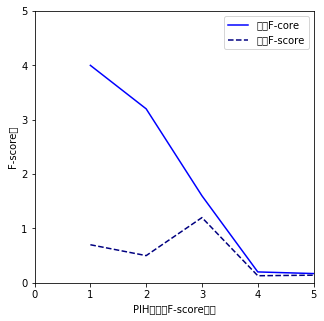

In [54]:
#针对传统F-score和改进的F-score画图比较
import matplotlib.pyplot as plt
X_ = [1,2,3,4,5]
y1 = [4,3.2,1.6,0.2,0.17]
y2 = [0.7,0.5,1.2,0.13,0.14]
plt.figure(figsize = (5,5))
plt.plot(X_,y1,color = 'blue',label = '改进F-core',linestyle = '-')
plt.plot(X_,y2,color = 'navy',label = '传统F-score',linestyle = '--')
plt.xlim([0,5])
plt.ylim([0,5])
plt.xlabel('PIH的两种F-score比较')
plt.ylabel('F-score值')
plt.legend(loc ='upper right')
plt.show()

In [ ]:
#数据分离训练集，验证集
def data_separate(initial_data2,y):
    train_X,test_X,train_y,test_y = train_test_split(initial_data2,
                                                    y,
                                                    test_size = 0.3)
                                                    #random_state = 1)
    train_X.shape,test_X.shape,train_y.shape,test_y.shape

    X_train = train_X.astype(np.int64)
    y_train = train_y
    test_X = test_X.astype(np.int64)

    #因为取训练集，验证集时打乱了顺序，所以重新排序
    X = X_train.sort_index()
    y = y_train.sort_index()
    test_X = test_X.sort_index()
    y_test = test_y.sort_index()

    
    #将y中二分类的负例的2变成0，方便AUC的计算
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)
    '''
    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
                #print(y_test_roc[i][index])
    #print(y_test_roc[calRoc])
    '''
    return (X_train,y_train,test_X,y_test)  


#将y中二分类的负例的2变成0，方便AUC的计算
def y_2change_0(data_label):
    y_roc = data_label.copy(deep = True)
    y_roc.index = range(len(y_roc))
    #print(y_test_roc)

    for i in y_roc[calRoc]:
        for index,item in enumerate(y_roc[i]):
            if item == 2:
                y_roc[i][index] = 0
    return y_roc
#print(y_roc[calRoc])


In [55]:
#特征nunique分布,标签
for cat_fea in y[calRoc].columns:
    print(cat_fea + '的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea,y[cat_fea].nunique()))
    print(y_test[cat_fea].value_counts())

PIH的特征分布如下：
PIH特征有个2不同的值


KeyError: 'PIH'

In [35]:
#神经网络修改前
'''
    for i in y.columns:
        if i in calRoc:
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
                model = Sequential()
                model.add(Dense(22,input_shape = (22,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            elif i == 'PREMATUR':
                X_train,y_train,test_X,y_test = data_separate(data_attribute3,y)
                model = Sequential()
                model.add(Dense(23,input_shape = (23,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
                model = Sequential()
                model.add(Dense(24,input_shape = (24,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
'''

"\n    for i in y.columns:\n        if i in calRoc:\n            if i == 'PIH' or i == 'PREECLAM':\n                X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)\n                model = Sequential()\n                model.add(Dense(22,input_shape = (22,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))\n                model.add(Dense(64,activation = 'relu'))\n                model.add(Dense(1,activation = 'sigmoid'))\n            elif i == 'PREMATUR':\n                X_train,y_train,test_X,y_test = data_separate(data_attribute3,y)\n                model = Sequential()\n                model.add(Dense(23,input_shape = (23,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))\n                model.add(Dense(64,activation = 'relu'))\n                model.add(Dense(1,activation = 'sigmoid'))\n            else:\n                X_train,y_train,test_X,y_test 

In [56]:
#处理二分类标签
from keras.models import Sequential
from keras.layers import  Dense,Dropout,Activation
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils.np_utils import to_categorical
import numpy as np
from keras import optimizers
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
from keras import regularizers
a = []
predlist = []


def neural_network_2fenlei(b,c):
    b = 0
    c = 0
    for i in y.columns:
        if i in calRoc:
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
                y_test = y_test[i]
                X_train, y_train = smo.fit_resample(X_train,y_train[i])
                model = Sequential()
                model.add(Dense(22,input_shape = (22,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            elif i == 'PREMATUR':
                X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
                y_test = y_test[i]
                X_train, y_train = smo.fit_resample(X_train,y_train[i])
                model = Sequential()
                model.add(Dense(23,input_shape = (23,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute, y)
                y_test = y_test[i]
                X_train, y_train = smo.fit_resample(X_train,y_train[i])
                model = Sequential()
                model.add(Dense(24,input_shape = (24,),activation = 'relu',kernel_regularizer=regularizers.l2(0.01),activity_regularizer=regularizers.l1(0.01)))
                model.add(Dense(64,activation = 'relu'))
                model.add(Dense(1,activation = 'sigmoid'))
            #model.summary()
            #sgd = optimizers.SGD(lr = 0.6,momentum=0.9)
            model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'] )
            model.fit(X_train,y_train,validation_data = (test_X,y_test),epochs = 20,batch_size = 50 )
            pred = model.predict(test_X)
            #计算F1-score
            #predlist.append(pred)
            #b = b + float(metrics.f1_score(y_test[i], pred))
            #c+=1
            #print(i,'Precision',metrics.precision_score(y_test[i], pred))
            #print(i,'Recall',metrics.recall_score(y_test[i], pred))
            #print(i,'f1_score',metrics.f1_score(y_test[i], pred))
            #计算ROC
            #pred = [0 for i in pred if i.isnull()]
            #pred = [int(i) for i in pred ]
            #print(pred)
            b = b + (roc_auc_score(y_test,pred))
            c+=1
            fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
            #print(fpr)
            #print(tpr)
            #print(thresholds)
            #print(metrics.auc(fpr, tpr))
            print(i,'AUC 的值为:',roc_auc_score(y_test,pred))
            with open('D:\jupyter\genetic algorithm\One_label.txt', 'a') as f:
                f.writelines("%s的AUC为%s\n" % (i,roc_auc_score(y_test,pred)))
            if c == 5:
                with open('D:\jupyter\genetic algorithm\One_label.txt', 'a') as f:
                    f.writelines("-------------------------------------------\n")
    #return('AUC的平均值为 %.8f'%(float(b/c)))
    return(float(b/c),pred)

    #print('***********************')
    #print('f1的平均值为 %.8f'%(float(b/c)))
    #print('***********************')
    #predlist = np.array(predlist)
    #predlist = predlist.reshape(13,353)
    #predlist = np.transpose(predlist)
    #print(np.array(predlist).shape)
    #print(predlist)
    #df = pd.DataFrame(predlist)
    #df.columns = calRoc
    #print(df)
            #print(y_test[i].values.tolist(),pred.shape)
            #scores = model.evaluate(test_X,y_test[i],verbose = 0)
            #a.append([i,scores[1]])
    #print(a)

In [57]:
#编码
from sklearn.model_selection import train_test_split
X = data_attribute_N1
y = data_label

'''
##################排名靠后的10个特征取出#################
initial_zero_feature = []
for i in s_d[-10:]:
    initial_zero_feature.append(i[1])
#print(initial_zero_feature)

initial_data = X.copy(deep = True)
initial_data.loc[:,initial_zero_feature] = 0
#print(initial_data)
'''
########################编码#####################################
#pop表示种群矩阵，一行表示一个二进制编码表示的DNA，矩阵的行数为种群数目,DNA_SIZE为编码长度
POP_SIZE = 10
DNA_SIZE = len(X.columns)
def incoding(POP_SIZE,DNA_SIZE):
    #print(DNA_SIZE)   #24
    np.random.seed(1)
    pop = pd.DataFrame(np.random.randint(2,size = (POP_SIZE,DNA_SIZE)))
    #print(pop.shape)  #(10，24)
    #print(type(pop))

    #print(pop)

    #将随机初始化的特征组合中为0的列数取出来
    list_location = []
    location = 0
    for i in range(len(pop)):
        tmp = []
        for j in range(24):
            if pop[j][i] == 0:
                tmp.append(location)
            location+=1
        location = 0
        list_location.append(tmp)
    #print(list_location)
    return(pop,list_location)

In [ ]:
print(list_location)

**参数replace**
用来设置是否可以取相同元素：
True表示可以取相同数字；
False表示不可以取相同数字。
默认是True

### 遗传算法参考:https://blog.csdn.net/ha_ha_ha233/article/details/91364937

In [58]:
#选择
import copy
#fitness = copy.deepcopy(list_auc)

def select(fitness):
    idx = np.random.choice(np.arange(20),size = 10,replace = False,
                          p = (fitness)/(np.array(fitness).sum()))
    return idx

#choice_index = np.sort(select(pop,fitness))
#pop_choice = pop.iloc[choice_index]
#print(pop.iloc[choice_index].index = range(8)
#pop_choice.index = range(8)
#print(pop_choice)

In [59]:
#交叉、变异

def mutation(child,MUTATION_RATE):
    np.random.seed(None)
    if np.random.rand() < MUTATION_RATE:        #以MUTATION_RATE的概率进行变异
        mutate_point = np.random.randint(0,DNA_SIZE)    #随机产生一个实数，代表要变异基因的位置
        child[mutate_point] = child[mutate_point]^1     #将变异点的二进制反转
    return child

def crossover_and_mutation(pop_choice,CROSSOVER_RATE):
    np.random.seed(None)
    new_pop = []
    for i in range(len(pop_choice)): #遍历种群中每个个体，将该个体作为父亲
        father = pop_choice.iloc[i]
        child = father.copy(deep = True)         #孩子先得父亲的全部基因（这里一串二进制的那些1，0成为基因）
        if np.random.rand() < CROSSOVER_RATE:    #产生子代不是必然发生交叉，而是以一定概率发生交叉
            mother = pop_choice.iloc[np.random.randint(POP_SIZE)]   #在种群中选择另一个个体，并将该个体作为母亲
            cross_points = np.random.randint(low = 0,high = DNA_SIZE)   #随机产生交叉的点
            child[cross_points:] = mother[cross_points:]         #孩子得到位于交叉点后的母亲的基因
        child = mutation(child,MUTATION_RATE = 0.05)     #每个后代有一定的几率发生变异
        new_pop.append(child)
    return new_pop



In [60]:
##########################主程序#########################
with open('D:\jupyter\genetic algorithm\zhongqun.txt', 'a') as f:
    f.seek(0)
    f.truncate()  #清空文件
with open('D:\jupyter\genetic algorithm\One_label.txt', 'a') as f:
    f.seek(0)
    f.truncate()  #清空文件
with open('D:\jupyter\genetic algorithm\pop_choice.txt', 'a') as f:
    f.seek(0)
    f.truncate()  #清空文件
POP_SIZE = 10
DNA_SIZE = len(X.columns)
list_auc = []
b = 0
c = 0
y = y_2change_0(data_label)          #将负类标签2变为0方便计算AUC
#编码
pop,list_location = incoding(POP_SIZE,DNA_SIZE)         #随机生成的新种群pop:10X24 ，list_location存放为0的属性的列索引
#初始化
for i in list_location:
    initial_data2 = data_attribute_N1.copy(deep = True)
    initial_data2.iloc[:,i] = 0           #新个体属性为0的列置0
    X_train,y_train,test_X,y_test=data_separate(initial_data2,y)    #分训练集，测试集
    AUC_average = neural_network_2fenlei(b,c)      #一次计算4个二分类标签的平均值
    list_auc.append(AUC_average)                   #将平均值作为个体存储起来作为种群,每个值代表自己的适应度
fitness = copy.deepcopy(list_auc)                 #AUC作为适应度函数  10个
#choice_index = np.sort(select(fitness_initial))    #第一次选择的索引
#pop_choice = pop.iloc[choice_index]           #第一次选择的整个种群数据
pop_choice = pop #(10,24)
#pop_choice.index = range(10)                   #第一次选择的整体数据重置索引
print('初始化适应度AUC的值为:{}'.format(fitness))
#选择变异遗传
for i in range(2):  #n_genertions为迭代次数
    list_auc = []
    new_pop = pd.DataFrame(crossover_and_mutation(pop_choice,CROSSOVER_RATE = 0.8))  #种群通过交叉变异产生后代，child 10个，father 10个
    new_pop.index = range(10)
    #将随机初始化的特征组合中为0的列数取出来
    list_location = []
    location = 0
    for j in range(len(new_pop)):
        tmp = []
        for k in range(new_pop.shape[1]):
            if new_pop[k][j] == 0:
                tmp.append(location)
            location+=1
        location = 0
        list_location.append(tmp)
        
    for u in list_location:                #对遗传变异的新个体重新将列号为0的列置0
        initial_data3 = data_attribute_N1.copy(deep = True)
        initial_data3.iloc[:,u] = 0
        X_train,y_train,test_X,y_test=data_separate(initial_data3,y)    #分训练集，测试集
        AUC_average = neural_network_2fenlei(b,c)      #一次计算12个二分类标签的平均值
        list_auc.append(AUC_average)                   #将平均值作为个体存储起来作为种群,每个值代表自己的适应度
    #fitness = copy.deepcopy(list_auc)                 #AUC作为适应度函数
    fitness.extend(list_auc)
    choice_index = np.sort(select(fitness))        #需要筛选的10个索引
    fitness = copy.deepcopy(list_auc)
    sum_pop = pd.concat([pop,new_pop],axis = 0)    #拼接20个个体以便按索引筛选出10个
    sum_pop.index = range(20)
    pop_choice = pd.DataFrame(sum_pop).iloc[choice_index]    #筛选出来新种群（10个个体）
    pd.set_option('display.max_columns', None)
    with open('D:\jupyter\genetic algorithm\pop_choice.txt', 'a') as f:
        f.writelines("第%s迭代的种群为%s\n" %(i+1,pop_choice))
        f.writelines('----------------------\n')
    pop_choice.index = range(10)             #索引重新排序
    pop = copy.deepcopy(new_pop)              #保证下次拼接正确
    print('第{}次迭代的AUC值为:{}'.format(i+1,fitness))
    with open('D:\jupyter\genetic algorithm\zhongqun.txt', 'a') as f:
        f.writelines('------------------------,第%s次迭代的种群为\n'%(i+1))
        f.writelines("%s\n" % l for l in fitness)
        f.writelines('------------------------\n')
'''
    if i == 0:
        fitness.extend(fitness)   #20个
    else:
        fitness_prev = copy.deepcopy(list_auc)
        fitness.extend(fitness_prev)
    choice_index = np.sort(select(fitness))        #按概率选出比较好的个体的编号
    #fitness_prev = copy.deepcopy(list_auc)
    pop_choice = pd.DataFrame(new_pop).iloc[choice_index]           #第二次选择的整个种群数据
    pop_choice.index = range(10)                   #第二次选择的整体数据重置索引
    print('第{}次迭代的AUC值为:{}'.format(i,fitness))                #输出每次迭代的种群AUC值
    #fitness = []
'''

Train on 2133 samples, validate on 620 samples
Epoch 1/20
2133/2133 [==============================] - 0s 202us/step - loss: 108.1751 - accuracy: 0.6010 - val_loss: 81.6013 - val_accuracy: 0.9581
Epoch 2/20
2133/2133 [==============================] - 0s 34us/step - loss: 64.7893 - accuracy: 0.6451 - val_loss: 46.0829 - val_accuracy: 0.9726
Epoch 3/20
2133/2133 [==============================] - 0s 39us/step - loss: 30.8933 - accuracy: 0.6634 - val_loss: 15.6872 - val_accuracy: 0.9726
Epoch 4/20
2133/2133 [==============================] - 0s 40us/step - loss: 6.9072 - accuracy: 0.6629 - val_loss: 1.2030 - val_accuracy: 0.9726
Epoch 5/20
2133/2133 [==============================] - 0s 38us/step - loss: 0.9453 - accuracy: 0.6667 - val_loss: 0.6330 - val_accuracy: 0.9726
Epoch 6/20
2133/2133 [==============================] - 0s 35us/step - loss: 0.7552 - accuracy: 0.6667 - val_loss: 0.5302 - val_accuracy: 0.9726
Epoch 7/20
2133/2133 [==============================] - 0s 36us/step - loss

Epoch 16/20
1906/1906 [==============================] - 0s 40us/step - loss: 0.6540 - accuracy: 0.6668 - val_loss: 0.4945 - val_accuracy: 0.8919
Epoch 17/20
1906/1906 [==============================] - 0s 57us/step - loss: 0.6521 - accuracy: 0.6668 - val_loss: 0.4993 - val_accuracy: 0.8919
Epoch 18/20
1906/1906 [==============================] - 0s 53us/step - loss: 0.6498 - accuracy: 0.6668 - val_loss: 0.4934 - val_accuracy: 0.8919
Epoch 19/20
1906/1906 [==============================] - 0s 37us/step - loss: 0.6475 - accuracy: 0.6668 - val_loss: 0.4938 - val_accuracy: 0.8919
Epoch 20/20
1906/1906 [==============================] - 0s 38us/step - loss: 0.6469 - accuracy: 0.6668 - val_loss: 0.4881 - val_accuracy: 0.8919
DISTRESS AUC 的值为: 0.5009041591320073
Train on 2067 samples, validate on 620 samples
Epoch 1/20
2067/2067 [==============================] - 0s 123us/step - loss: 121.5733 - accuracy: 0.6134 - val_loss: 84.2926 - val_accuracy: 0.9387
Epoch 2/20
2067/2067 [===============

2127/2127 [==============================] - 0s 37us/step - loss: 0.6809 - accuracy: 0.6667 - val_loss: 0.4638 - val_accuracy: 0.9790
Epoch 11/20
2127/2127 [==============================] - 0s 35us/step - loss: 0.6718 - accuracy: 0.6667 - val_loss: 0.4480 - val_accuracy: 0.9790
Epoch 12/20
2127/2127 [==============================] - 0s 37us/step - loss: 0.6630 - accuracy: 0.6667 - val_loss: 0.4397 - val_accuracy: 0.9790
Epoch 13/20
2127/2127 [==============================] - 0s 51us/step - loss: 0.6566 - accuracy: 0.6667 - val_loss: 0.4321 - val_accuracy: 0.9790
Epoch 14/20
2127/2127 [==============================] - 0s 40us/step - loss: 0.6519 - accuracy: 0.6667 - val_loss: 0.4381 - val_accuracy: 0.9790
Epoch 15/20
2127/2127 [==============================] - 0s 39us/step - loss: 0.6490 - accuracy: 0.6667 - val_loss: 0.4382 - val_accuracy: 0.9790
Epoch 16/20
2127/2127 [==============================] - 0s 35us/step - loss: 0.6467 - accuracy: 0.6667 - val_loss: 0.4338 - val_accurac

2077/2077 [==============================] - 0s 39us/step - loss: 2.8722 - accuracy: 0.6659 - val_loss: 0.8147 - val_accuracy: 0.9500
Epoch 5/20
2077/2077 [==============================] - 0s 39us/step - loss: 0.8172 - accuracy: 0.6668 - val_loss: 0.6179 - val_accuracy: 0.9500
Epoch 6/20
2077/2077 [==============================] - 0s 38us/step - loss: 0.7493 - accuracy: 0.6668 - val_loss: 0.5495 - val_accuracy: 0.9500
Epoch 7/20
2077/2077 [==============================] - 0s 44us/step - loss: 0.7212 - accuracy: 0.6668 - val_loss: 0.5181 - val_accuracy: 0.9500
Epoch 8/20
2077/2077 [==============================] - 0s 39us/step - loss: 0.7019 - accuracy: 0.6668 - val_loss: 0.4936 - val_accuracy: 0.9500
Epoch 9/20
2077/2077 [==============================] - 0s 41us/step - loss: 0.6874 - accuracy: 0.6668 - val_loss: 0.4867 - val_accuracy: 0.9500
Epoch 10/20
2077/2077 [==============================] - 0s 40us/step - loss: 0.6765 - accuracy: 0.6668 - val_loss: 0.4708 - val_accuracy: 0.

2118/2118 [==============================] - 0s 38us/step - loss: 0.6443 - accuracy: 0.6667 - val_loss: 0.4214 - val_accuracy: 0.9887
Epoch 20/20
2118/2118 [==============================] - 0s 36us/step - loss: 0.6441 - accuracy: 0.6667 - val_loss: 0.4180 - val_accuracy: 0.9887
PIH AUC 的值为: 0.5040783034257749
Train on 2040 samples, validate on 620 samples
Epoch 1/20
2040/2040 [==============================] - 0s 139us/step - loss: 170.8890 - accuracy: 0.5417 - val_loss: 123.1266 - val_accuracy: 0.2048
Epoch 2/20
2040/2040 [==============================] - 0s 41us/step - loss: 97.1184 - accuracy: 0.5667 - val_loss: 68.4703 - val_accuracy: 0.7161
Epoch 3/20
2040/2040 [==============================] - 0s 42us/step - loss: 50.0418 - accuracy: 0.6451 - val_loss: 31.3206 - val_accuracy: 0.9468
Epoch 4/20
2040/2040 [==============================] - 0s 41us/step - loss: 21.4487 - accuracy: 0.6632 - val_loss: 12.0958 - val_accuracy: 0.9468
Epoch 5/20
2040/2040 [============================

2088/2088 [==============================] - 0s 36us/step - loss: 0.6433 - accuracy: 0.6667 - val_loss: 0.4526 - val_accuracy: 0.9387
Epoch 14/20
2088/2088 [==============================] - 0s 36us/step - loss: 0.6421 - accuracy: 0.6667 - val_loss: 0.4586 - val_accuracy: 0.9387
Epoch 15/20
2088/2088 [==============================] - 0s 37us/step - loss: 0.6420 - accuracy: 0.6667 - val_loss: 0.4662 - val_accuracy: 0.9387
Epoch 16/20
2088/2088 [==============================] - 0s 36us/step - loss: 0.6411 - accuracy: 0.6667 - val_loss: 0.4521 - val_accuracy: 0.9387
Epoch 17/20
2088/2088 [==============================] - 0s 40us/step - loss: 0.6409 - accuracy: 0.6667 - val_loss: 0.4531 - val_accuracy: 0.9387
Epoch 18/20
2088/2088 [==============================] - 0s 34us/step - loss: 0.6403 - accuracy: 0.6667 - val_loss: 0.4583 - val_accuracy: 0.9387
Epoch 19/20
2088/2088 [==============================] - 0s 34us/step - loss: 0.6400 - accuracy: 0.6667 - val_loss: 0.4522 - val_accurac

2047/2047 [==============================] - 0s 36us/step - loss: 0.7577 - accuracy: 0.6668 - val_loss: 0.5590 - val_accuracy: 0.9387
Epoch 8/20
2047/2047 [==============================] - 0s 37us/step - loss: 0.7333 - accuracy: 0.6668 - val_loss: 0.5350 - val_accuracy: 0.9387
Epoch 9/20
2047/2047 [==============================] - 0s 34us/step - loss: 0.7149 - accuracy: 0.6668 - val_loss: 0.5166 - val_accuracy: 0.9387
Epoch 10/20
2047/2047 [==============================] - 0s 33us/step - loss: 0.7000 - accuracy: 0.6668 - val_loss: 0.5019 - val_accuracy: 0.9371
Epoch 11/20
2047/2047 [==============================] - 0s 32us/step - loss: 0.6884 - accuracy: 0.6668 - val_loss: 0.4944 - val_accuracy: 0.9387
Epoch 12/20
2047/2047 [==============================] - 0s 32us/step - loss: 0.6784 - accuracy: 0.6668 - val_loss: 0.4822 - val_accuracy: 0.9387
Epoch 13/20
2047/2047 [==============================] - 0s 32us/step - loss: 0.6714 - accuracy: 0.6668 - val_loss: 0.4758 - val_accuracy:

2136/2136 [==============================] - 0s 120us/step - loss: 152.5205 - accuracy: 0.5604 - val_loss: 92.6046 - val_accuracy: 0.9516
Epoch 2/20
2136/2136 [==============================] - 0s 38us/step - loss: 60.4151 - accuracy: 0.6091 - val_loss: 29.8297 - val_accuracy: 0.9065
Epoch 3/20
2136/2136 [==============================] - 0s 38us/step - loss: 20.7972 - accuracy: 0.6643 - val_loss: 12.9316 - val_accuracy: 0.9839
Epoch 4/20
2136/2136 [==============================] - 0s 37us/step - loss: 8.1529 - accuracy: 0.6643 - val_loss: 2.3053 - val_accuracy: 0.9871
Epoch 5/20
2136/2136 [==============================] - 0s 36us/step - loss: 1.1555 - accuracy: 0.6648 - val_loss: 0.7284 - val_accuracy: 0.9919
Epoch 6/20
2136/2136 [==============================] - 0s 35us/step - loss: 0.7853 - accuracy: 0.6662 - val_loss: 0.5973 - val_accuracy: 0.9919
Epoch 7/20
2136/2136 [==============================] - 0s 36us/step - loss: 0.7487 - accuracy: 0.6667 - val_loss: 0.5336 - val_accur

2052/2052 [==============================] - 0s 30us/step - loss: 0.6434 - accuracy: 0.6667 - val_loss: 0.4486 - val_accuracy: 0.9339
Epoch 17/20
2052/2052 [==============================] - 0s 30us/step - loss: 0.6428 - accuracy: 0.6667 - val_loss: 0.4466 - val_accuracy: 0.9339
Epoch 18/20
2052/2052 [==============================] - 0s 33us/step - loss: 0.6411 - accuracy: 0.6667 - val_loss: 0.4459 - val_accuracy: 0.9339
Epoch 19/20
2052/2052 [==============================] - 0s 50us/step - loss: 0.6405 - accuracy: 0.6667 - val_loss: 0.4520 - val_accuracy: 0.9339
Epoch 20/20
2052/2052 [==============================] - 0s 31us/step - loss: 0.6398 - accuracy: 0.6667 - val_loss: 0.4640 - val_accuracy: 0.9339
PREMATUR AUC 的值为: 0.4844348961624331
Train on 1906 samples, validate on 620 samples
Epoch 1/20
1906/1906 [==============================] - 0s 128us/step - loss: 154.0922 - accuracy: 0.5976 - val_loss: 103.0695 - val_accuracy: 0.4516
Epoch 2/20
1906/1906 [==========================

2142/2142 [==============================] - 0s 36us/step - loss: 0.6713 - accuracy: 0.6667 - val_loss: 0.4383 - val_accuracy: 0.9855
Epoch 11/20
2142/2142 [==============================] - 0s 37us/step - loss: 0.6634 - accuracy: 0.6667 - val_loss: 0.4447 - val_accuracy: 0.9855
Epoch 12/20
2142/2142 [==============================] - 0s 38us/step - loss: 0.6580 - accuracy: 0.6667 - val_loss: 0.4338 - val_accuracy: 0.9855
Epoch 13/20
2142/2142 [==============================] - 0s 36us/step - loss: 0.6528 - accuracy: 0.6667 - val_loss: 0.4230 - val_accuracy: 0.9855
Epoch 14/20
2142/2142 [==============================] - 0s 37us/step - loss: 0.6490 - accuracy: 0.6667 - val_loss: 0.4218 - val_accuracy: 0.9855
Epoch 15/20
2142/2142 [==============================] - 0s 37us/step - loss: 0.6474 - accuracy: 0.6667 - val_loss: 0.4233 - val_accuracy: 0.9855
Epoch 16/20
2142/2142 [==============================] - 0s 52us/step - loss: 0.6472 - accuracy: 0.6667 - val_loss: 0.4255 - val_accurac

1906/1906 [==============================] - 0s 38us/step - loss: 21.7660 - accuracy: 0.6663 - val_loss: 16.2255 - val_accuracy: 0.8919
Epoch 5/20
1906/1906 [==============================] - 0s 38us/step - loss: 11.8911 - accuracy: 0.6668 - val_loss: 6.5488 - val_accuracy: 0.8919
Epoch 6/20
1906/1906 [==============================] - 0s 39us/step - loss: 2.9186 - accuracy: 0.5771 - val_loss: 0.8192 - val_accuracy: 0.8903
Epoch 7/20
1906/1906 [==============================] - 0s 38us/step - loss: 0.7807 - accuracy: 0.6668 - val_loss: 0.7045 - val_accuracy: 0.8919
Epoch 8/20
1906/1906 [==============================] - 0s 38us/step - loss: 0.7282 - accuracy: 0.6668 - val_loss: 0.6291 - val_accuracy: 0.8919
Epoch 9/20
1906/1906 [==============================] - 0s 37us/step - loss: 0.6975 - accuracy: 0.6668 - val_loss: 0.5662 - val_accuracy: 0.8919
Epoch 10/20
1906/1906 [==============================] - 0s 39us/step - loss: 0.6801 - accuracy: 0.6668 - val_loss: 0.5275 - val_accuracy:

2148/2148 [==============================] - 0s 36us/step - loss: 0.6471 - accuracy: 0.6667 - val_loss: 0.4355 - val_accuracy: 0.9790
Epoch 20/20
2148/2148 [==============================] - 0s 35us/step - loss: 0.6440 - accuracy: 0.6667 - val_loss: 0.4416 - val_accuracy: 0.9790
PDA AUC 的值为: 0.5041186161449753
Train on 2124 samples, validate on 620 samples
Epoch 1/20
2124/2124 [==============================] - 0s 128us/step - loss: 69.1575 - accuracy: 0.5791 - val_loss: 43.3963 - val_accuracy: 0.4855
Epoch 2/20
2124/2124 [==============================] - 0s 38us/step - loss: 28.2926 - accuracy: 0.6573 - val_loss: 16.3670 - val_accuracy: 0.9806
Epoch 3/20
2124/2124 [==============================] - 0s 38us/step - loss: 10.8787 - accuracy: 0.6662 - val_loss: 5.7697 - val_accuracy: 0.9823
Epoch 4/20
2124/2124 [==============================] - 0s 35us/step - loss: 2.9180 - accuracy: 0.6662 - val_loss: 0.8777 - val_accuracy: 0.9823
Epoch 5/20
2124/2124 [==============================] -

1918/1918 [==============================] - 0s 33us/step - loss: 0.6747 - accuracy: 0.6668 - val_loss: 0.5285 - val_accuracy: 0.8790
Epoch 14/20
1918/1918 [==============================] - 0s 31us/step - loss: 0.6688 - accuracy: 0.6668 - val_loss: 0.5167 - val_accuracy: 0.8790
Epoch 15/20
1918/1918 [==============================] - 0s 32us/step - loss: 0.6620 - accuracy: 0.6668 - val_loss: 0.5135 - val_accuracy: 0.8790
Epoch 16/20
1918/1918 [==============================] - 0s 32us/step - loss: 0.6584 - accuracy: 0.6668 - val_loss: 0.5098 - val_accuracy: 0.8790
Epoch 17/20
1918/1918 [==============================] - 0s 33us/step - loss: 0.6545 - accuracy: 0.6668 - val_loss: 0.5022 - val_accuracy: 0.8790
Epoch 18/20
1918/1918 [==============================] - 0s 31us/step - loss: 0.6512 - accuracy: 0.6668 - val_loss: 0.5034 - val_accuracy: 0.8790
Epoch 19/20
1918/1918 [==============================] - 0s 32us/step - loss: 0.6498 - accuracy: 0.6668 - val_loss: 0.5018 - val_accurac

2131/2131 [==============================] - 0s 37us/step - loss: 0.7209 - accuracy: 0.6668 - val_loss: 0.4906 - val_accuracy: 0.9742
Epoch 8/20
2131/2131 [==============================] - 0s 35us/step - loss: 0.7035 - accuracy: 0.6668 - val_loss: 0.4843 - val_accuracy: 0.9742
Epoch 9/20
2131/2131 [==============================] - 0s 37us/step - loss: 0.6895 - accuracy: 0.6668 - val_loss: 0.4716 - val_accuracy: 0.9742
Epoch 10/20
2131/2131 [==============================] - 0s 35us/step - loss: 0.6779 - accuracy: 0.6668 - val_loss: 0.4648 - val_accuracy: 0.9742
Epoch 11/20
2131/2131 [==============================] - 0s 36us/step - loss: 0.6697 - accuracy: 0.6668 - val_loss: 0.4542 - val_accuracy: 0.9742
Epoch 12/20
2131/2131 [==============================] - 0s 34us/step - loss: 0.6628 - accuracy: 0.6668 - val_loss: 0.4392 - val_accuracy: 0.9742
Epoch 13/20
2131/2131 [==============================] - 0s 33us/step - loss: 0.6569 - accuracy: 0.6668 - val_loss: 0.4263 - val_accuracy:

2062/2062 [==============================] - 0s 127us/step - loss: 199.7972 - accuracy: 0.6237 - val_loss: 123.5254 - val_accuracy: 0.9645
Epoch 2/20
2062/2062 [==============================] - 0s 43us/step - loss: 74.5485 - accuracy: 0.6717 - val_loss: 35.3081 - val_accuracy: 0.5661
Epoch 3/20
2062/2062 [==============================] - 0s 41us/step - loss: 15.3968 - accuracy: 0.6707 - val_loss: 2.4114 - val_accuracy: 0.9613
Epoch 4/20
2062/2062 [==============================] - 0s 42us/step - loss: 1.2479 - accuracy: 0.6668 - val_loss: 0.7744 - val_accuracy: 0.9661
Epoch 5/20
2062/2062 [==============================] - 0s 42us/step - loss: 0.8271 - accuracy: 0.6668 - val_loss: 0.6195 - val_accuracy: 0.9661
Epoch 6/20
2062/2062 [==============================] - 0s 38us/step - loss: 0.7776 - accuracy: 0.6668 - val_loss: 0.5478 - val_accuracy: 0.9661
Epoch 7/20
2062/2062 [==============================] - 0s 37us/step - loss: 0.7469 - accuracy: 0.6668 - val_loss: 0.5171 - val_accur

2122/2122 [==============================] - 0s 32us/step - loss: 0.6497 - accuracy: 0.6668 - val_loss: 0.4331 - val_accuracy: 0.9839
Epoch 17/20
2122/2122 [==============================] - 0s 32us/step - loss: 0.6478 - accuracy: 0.6668 - val_loss: 0.4309 - val_accuracy: 0.9839
Epoch 18/20
2122/2122 [==============================] - 0s 32us/step - loss: 0.6459 - accuracy: 0.6668 - val_loss: 0.4204 - val_accuracy: 0.9839
Epoch 19/20
2122/2122 [==============================] - 0s 31us/step - loss: 0.6447 - accuracy: 0.6668 - val_loss: 0.4234 - val_accuracy: 0.9839
Epoch 20/20
2122/2122 [==============================] - 0s 33us/step - loss: 0.6431 - accuracy: 0.6668 - val_loss: 0.4296 - val_accuracy: 0.9839
PIH AUC 的值为: 0.40950819672131145
Train on 2043 samples, validate on 620 samples
Epoch 1/20
2043/2043 [==============================] - 0s 127us/step - loss: 149.8237 - accuracy: 0.6099 - val_loss: 97.5416 - val_accuracy: 0.9435
Epoch 2/20
2043/2043 [==============================]

2073/2073 [==============================] - 0s 36us/step - loss: 0.6627 - accuracy: 0.6667 - val_loss: 0.4560 - val_accuracy: 0.9548
Epoch 11/20
2073/2073 [==============================] - 0s 36us/step - loss: 0.6566 - accuracy: 0.6667 - val_loss: 0.4647 - val_accuracy: 0.9548
Epoch 12/20
2073/2073 [==============================] - 0s 35us/step - loss: 0.6536 - accuracy: 0.6667 - val_loss: 0.4543 - val_accuracy: 0.9548
Epoch 13/20
2073/2073 [==============================] - 0s 37us/step - loss: 0.6506 - accuracy: 0.6667 - val_loss: 0.4668 - val_accuracy: 0.9548
Epoch 14/20
2073/2073 [==============================] - 0s 36us/step - loss: 0.6494 - accuracy: 0.6667 - val_loss: 0.4589 - val_accuracy: 0.9548
Epoch 15/20
2073/2073 [==============================] - 0s 35us/step - loss: 0.6477 - accuracy: 0.6667 - val_loss: 0.4451 - val_accuracy: 0.9548
Epoch 16/20
2073/2073 [==============================] - 0s 34us/step - loss: 0.6467 - accuracy: 0.6667 - val_loss: 0.4436 - val_accurac

Epoch 5/20
2035/2035 [==============================] - 0s 38us/step - loss: 0.7554 - accuracy: 0.6673 - val_loss: 0.5579 - val_accuracy: 0.9516
Epoch 6/20
2035/2035 [==============================] - 0s 36us/step - loss: 0.7221 - accuracy: 0.6668 - val_loss: 0.5208 - val_accuracy: 0.9516
Epoch 7/20
2035/2035 [==============================] - 0s 39us/step - loss: 0.7004 - accuracy: 0.6668 - val_loss: 0.5086 - val_accuracy: 0.9516
Epoch 8/20
2035/2035 [==============================] - 0s 37us/step - loss: 0.6845 - accuracy: 0.6668 - val_loss: 0.4813 - val_accuracy: 0.9516
Epoch 9/20
2035/2035 [==============================] - 0s 36us/step - loss: 0.6729 - accuracy: 0.6668 - val_loss: 0.4707 - val_accuracy: 0.9516
Epoch 10/20
2035/2035 [==============================] - 0s 37us/step - loss: 0.6644 - accuracy: 0.6668 - val_loss: 0.4510 - val_accuracy: 0.9516
Epoch 11/20
2035/2035 [==============================] - 0s 37us/step - loss: 0.6584 - accuracy: 0.6668 - val_loss: 0.4595 - val_

2074/2074 [==============================] - 0s 36us/step - loss: 0.6405 - accuracy: 0.6668 - val_loss: 0.4526 - val_accuracy: 0.9532
LGA AUC 的值为: 0.485296691755645
Train on 2148 samples, validate on 620 samples
Epoch 1/20
2148/2148 [==============================] - 0s 121us/step - loss: 166.3388 - accuracy: 0.5503 - val_loss: 111.8956 - val_accuracy: 0.6016
Epoch 2/20
2148/2148 [==============================] - 0s 36us/step - loss: 81.4625 - accuracy: 0.6052 - val_loss: 53.7462 - val_accuracy: 0.9758
Epoch 3/20
2148/2148 [==============================] - 0s 35us/step - loss: 34.0735 - accuracy: 0.6615 - val_loss: 15.1747 - val_accuracy: 0.9629
Epoch 4/20
2148/2148 [==============================] - 0s 33us/step - loss: 6.6168 - accuracy: 0.6681 - val_loss: 1.1365 - val_accuracy: 0.9790
Epoch 5/20
2148/2148 [==============================] - 0s 32us/step - loss: 0.8895 - accuracy: 0.6667 - val_loss: 0.6776 - val_accuracy: 0.9790
Epoch 6/20
2148/2148 [==============================] 

Train on 2127 samples, validate on 620 samples
Epoch 1/20
2127/2127 [==============================] - 0s 130us/step - loss: 81.7940 - accuracy: 0.5679 - val_loss: 53.5033 - val_accuracy: 0.9210
Epoch 2/20
2127/2127 [==============================] - 0s 43us/step - loss: 36.0583 - accuracy: 0.6968 - val_loss: 19.7321 - val_accuracy: 0.9258
Epoch 3/20
2127/2127 [==============================] - 0s 42us/step - loss: 10.7772 - accuracy: 0.7146 - val_loss: 3.1636 - val_accuracy: 0.9774
Epoch 4/20
2127/2127 [==============================] - 0s 35us/step - loss: 1.3448 - accuracy: 0.6690 - val_loss: 0.7632 - val_accuracy: 0.9790
Epoch 5/20
2127/2127 [==============================] - 0s 37us/step - loss: 0.7771 - accuracy: 0.6667 - val_loss: 0.5889 - val_accuracy: 0.9790
Epoch 6/20
2127/2127 [==============================] - 0s 40us/step - loss: 0.7298 - accuracy: 0.6667 - val_loss: 0.5312 - val_accuracy: 0.9790
Epoch 7/20
2127/2127 [==============================] - 0s 37us/step - loss: 

Epoch 16/20
1915/1915 [==============================] - 0s 38us/step - loss: 0.6519 - accuracy: 0.6668 - val_loss: 0.5061 - val_accuracy: 0.8823
Epoch 17/20
1915/1915 [==============================] - 0s 38us/step - loss: 0.6497 - accuracy: 0.6668 - val_loss: 0.5038 - val_accuracy: 0.8823
Epoch 18/20
1915/1915 [==============================] - 0s 38us/step - loss: 0.6472 - accuracy: 0.6668 - val_loss: 0.4990 - val_accuracy: 0.8823
Epoch 19/20
1915/1915 [==============================] - 0s 37us/step - loss: 0.6466 - accuracy: 0.6668 - val_loss: 0.4945 - val_accuracy: 0.8823
Epoch 20/20
1915/1915 [==============================] - 0s 37us/step - loss: 0.6454 - accuracy: 0.6668 - val_loss: 0.4884 - val_accuracy: 0.8823
DISTRESS AUC 的值为: 0.5054844606946983
Train on 2068 samples, validate on 620 samples
Epoch 1/20
2068/2068 [==============================] - 0s 126us/step - loss: 67.7045 - accuracy: 0.5517 - val_loss: 38.8101 - val_accuracy: 0.8903
Epoch 2/20
2068/2068 [================

2124/2124 [==============================] - 0s 37us/step - loss: 0.6752 - accuracy: 0.6667 - val_loss: 0.4526 - val_accuracy: 0.9823
Epoch 11/20
2124/2124 [==============================] - 0s 37us/step - loss: 0.6662 - accuracy: 0.6667 - val_loss: 0.4410 - val_accuracy: 0.9823
Epoch 12/20
2124/2124 [==============================] - 0s 36us/step - loss: 0.6597 - accuracy: 0.6667 - val_loss: 0.4383 - val_accuracy: 0.9823
Epoch 13/20
2124/2124 [==============================] - 0s 36us/step - loss: 0.6542 - accuracy: 0.6667 - val_loss: 0.4395 - val_accuracy: 0.9823
Epoch 14/20
2124/2124 [==============================] - 0s 36us/step - loss: 0.6504 - accuracy: 0.6667 - val_loss: 0.4357 - val_accuracy: 0.9823
Epoch 15/20
2124/2124 [==============================] - 0s 35us/step - loss: 0.6475 - accuracy: 0.6667 - val_loss: 0.4317 - val_accuracy: 0.9823
Epoch 16/20
2124/2124 [==============================] - 0s 38us/step - loss: 0.6448 - accuracy: 0.6667 - val_loss: 0.4166 - val_accurac

2070/2070 [==============================] - 0s 37us/step - loss: 5.3621 - accuracy: 0.6667 - val_loss: 1.2149 - val_accuracy: 0.9581
Epoch 5/20
2070/2070 [==============================] - 0s 38us/step - loss: 0.8281 - accuracy: 0.6667 - val_loss: 0.6488 - val_accuracy: 0.9581
Epoch 6/20
2070/2070 [==============================] - 0s 37us/step - loss: 0.7184 - accuracy: 0.6667 - val_loss: 0.5531 - val_accuracy: 0.9581
Epoch 7/20
2070/2070 [==============================] - 0s 38us/step - loss: 0.6900 - accuracy: 0.6667 - val_loss: 0.4939 - val_accuracy: 0.9581
Epoch 8/20
2070/2070 [==============================] - 0s 37us/step - loss: 0.6742 - accuracy: 0.6667 - val_loss: 0.4685 - val_accuracy: 0.9581
Epoch 9/20
2070/2070 [==============================] - 0s 38us/step - loss: 0.6637 - accuracy: 0.6667 - val_loss: 0.4586 - val_accuracy: 0.9581
Epoch 10/20
2070/2070 [==============================] - 0s 37us/step - loss: 0.6566 - accuracy: 0.6667 - val_loss: 0.4467 - val_accuracy: 0.

2128/2128 [==============================] - 0s 31us/step - loss: 0.6462 - accuracy: 0.6668 - val_loss: 0.4356 - val_accuracy: 0.9774
Epoch 20/20
2128/2128 [==============================] - 0s 33us/step - loss: 0.6451 - accuracy: 0.6668 - val_loss: 0.4338 - val_accuracy: 0.9774
PIH AUC 的值为: 0.5008250825082509
Train on 2034 samples, validate on 620 samples
Epoch 1/20
2034/2034 [==============================] - 0s 121us/step - loss: 129.5430 - accuracy: 0.5998 - val_loss: 76.9991 - val_accuracy: 0.9403
Epoch 2/20
2034/2034 [==============================] - 0s 37us/step - loss: 51.3462 - accuracy: 0.6731 - val_loss: 27.6020 - val_accuracy: 0.9161
Epoch 3/20
2034/2034 [==============================] - 0s 38us/step - loss: 15.8695 - accuracy: 0.6790 - val_loss: 4.8439 - val_accuracy: 0.9323
Epoch 4/20
2034/2034 [==============================] - 0s 38us/step - loss: 1.8599 - accuracy: 0.6637 - val_loss: 0.7701 - val_accuracy: 0.9500
Epoch 5/20
2034/2034 [==============================] 

2059/2059 [==============================] - 0s 36us/step - loss: 0.6574 - accuracy: 0.6668 - val_loss: 0.4498 - val_accuracy: 0.9694
Epoch 14/20
2059/2059 [==============================] - 0s 36us/step - loss: 0.6537 - accuracy: 0.6668 - val_loss: 0.4366 - val_accuracy: 0.9694
Epoch 15/20
2059/2059 [==============================] - 0s 36us/step - loss: 0.6506 - accuracy: 0.6668 - val_loss: 0.4441 - val_accuracy: 0.9694
Epoch 16/20
2059/2059 [==============================] - 0s 36us/step - loss: 0.6485 - accuracy: 0.6668 - val_loss: 0.4399 - val_accuracy: 0.9694
Epoch 17/20
2059/2059 [==============================] - 0s 37us/step - loss: 0.6466 - accuracy: 0.6668 - val_loss: 0.4383 - val_accuracy: 0.9694
Epoch 18/20
2059/2059 [==============================] - 0s 36us/step - loss: 0.6461 - accuracy: 0.6668 - val_loss: 0.4455 - val_accuracy: 0.9694
Epoch 19/20
2059/2059 [==============================] - 0s 34us/step - loss: 0.6438 - accuracy: 0.6668 - val_loss: 0.4397 - val_accurac

Epoch 8/20
2049/2049 [==============================] - 0s 37us/step - loss: 0.7052 - accuracy: 0.6667 - val_loss: 0.5072 - val_accuracy: 0.9371
Epoch 9/20
2049/2049 [==============================] - 0s 38us/step - loss: 0.6906 - accuracy: 0.6667 - val_loss: 0.4980 - val_accuracy: 0.9371
Epoch 10/20
2049/2049 [==============================] - 0s 37us/step - loss: 0.6790 - accuracy: 0.6667 - val_loss: 0.4875 - val_accuracy: 0.9371
Epoch 11/20
2049/2049 [==============================] - 0s 38us/step - loss: 0.6697 - accuracy: 0.6667 - val_loss: 0.4806 - val_accuracy: 0.9371
Epoch 12/20
2049/2049 [==============================] - 0s 37us/step - loss: 0.6622 - accuracy: 0.6667 - val_loss: 0.4700 - val_accuracy: 0.9371
Epoch 13/20
2049/2049 [==============================] - 0s 38us/step - loss: 0.6571 - accuracy: 0.6667 - val_loss: 0.4712 - val_accuracy: 0.9371
Epoch 14/20
2049/2049 [==============================] - 0s 37us/step - loss: 0.6521 - accuracy: 0.6667 - val_loss: 0.4654 - v

2142/2142 [==============================] - 0s 38us/step - loss: 79.6737 - accuracy: 0.5649 - val_loss: 50.1137 - val_accuracy: 0.9790
Epoch 3/20
2142/2142 [==============================] - 0s 37us/step - loss: 35.4730 - accuracy: 0.6433 - val_loss: 22.0202 - val_accuracy: 0.9855
Epoch 4/20
2142/2142 [==============================] - 0s 34us/step - loss: 13.4197 - accuracy: 0.6662 - val_loss: 6.1219 - val_accuracy: 0.9855
Epoch 5/20
2142/2142 [==============================] - 0s 33us/step - loss: 2.5601 - accuracy: 0.6667 - val_loss: 0.7529 - val_accuracy: 0.9855
Epoch 6/20
2142/2142 [==============================] - 0s 31us/step - loss: 0.7760 - accuracy: 0.6667 - val_loss: 0.5654 - val_accuracy: 0.9855
Epoch 7/20
2142/2142 [==============================] - 0s 33us/step - loss: 0.7301 - accuracy: 0.6667 - val_loss: 0.5009 - val_accuracy: 0.9855
Epoch 8/20
2142/2142 [==============================] - 0s 33us/step - loss: 0.7077 - accuracy: 0.6667 - val_loss: 0.4716 - val_accuracy

2050/2050 [==============================] - 0s 34us/step - loss: 0.6427 - accuracy: 0.6668 - val_loss: 0.4605 - val_accuracy: 0.9355
Epoch 18/20
2050/2050 [==============================] - 0s 34us/step - loss: 0.6422 - accuracy: 0.6668 - val_loss: 0.4593 - val_accuracy: 0.9355
Epoch 19/20
2050/2050 [==============================] - 0s 34us/step - loss: 0.6413 - accuracy: 0.6668 - val_loss: 0.4594 - val_accuracy: 0.9355
Epoch 20/20
2050/2050 [==============================] - 0s 34us/step - loss: 0.6409 - accuracy: 0.6668 - val_loss: 0.4574 - val_accuracy: 0.9355
PREMATUR AUC 的值为: 0.48502155172413786
Train on 1924 samples, validate on 620 samples
Epoch 1/20
1924/1924 [==============================] - 0s 135us/step - loss: 58.7901 - accuracy: 0.5156 - val_loss: 22.7623 - val_accuracy: 0.7210
Epoch 2/20
1924/1924 [==============================] - 0s 39us/step - loss: 9.4637 - accuracy: 0.6476 - val_loss: 1.6378 - val_accuracy: 0.8597
Epoch 3/20
1924/1924 [============================

2140/2140 [==============================] - 0s 35us/step - loss: 0.6668 - accuracy: 0.6668 - val_loss: 0.4334 - val_accuracy: 0.9871
Epoch 12/20
2140/2140 [==============================] - 0s 37us/step - loss: 0.6600 - accuracy: 0.6668 - val_loss: 0.4309 - val_accuracy: 0.9871
Epoch 13/20
2140/2140 [==============================] - 0s 38us/step - loss: 0.6550 - accuracy: 0.6668 - val_loss: 0.4348 - val_accuracy: 0.9871
Epoch 14/20
2140/2140 [==============================] - 0s 35us/step - loss: 0.6521 - accuracy: 0.6668 - val_loss: 0.4293 - val_accuracy: 0.9871
Epoch 15/20
2140/2140 [==============================] - 0s 35us/step - loss: 0.6490 - accuracy: 0.6668 - val_loss: 0.4259 - val_accuracy: 0.9871
Epoch 16/20
2140/2140 [==============================] - 0s 36us/step - loss: 0.6467 - accuracy: 0.6668 - val_loss: 0.4252 - val_accuracy: 0.9871
Epoch 17/20
2140/2140 [==============================] - 0s 36us/step - loss: 0.6455 - accuracy: 0.6668 - val_loss: 0.4160 - val_accurac

1894/1894 [==============================] - 0s 37us/step - loss: 0.8824 - accuracy: 0.6663 - val_loss: 0.7010 - val_accuracy: 0.9048
Epoch 6/20
1894/1894 [==============================] - 0s 38us/step - loss: 0.7877 - accuracy: 0.6668 - val_loss: 0.6206 - val_accuracy: 0.9048
Epoch 7/20
1894/1894 [==============================] - 0s 38us/step - loss: 0.7538 - accuracy: 0.6668 - val_loss: 0.5804 - val_accuracy: 0.9048
Epoch 8/20
1894/1894 [==============================] - 0s 37us/step - loss: 0.7297 - accuracy: 0.6668 - val_loss: 0.5530 - val_accuracy: 0.9048
Epoch 9/20
1894/1894 [==============================] - 0s 38us/step - loss: 0.7111 - accuracy: 0.6668 - val_loss: 0.5340 - val_accuracy: 0.9048
Epoch 10/20
1894/1894 [==============================] - 0s 37us/step - loss: 0.6949 - accuracy: 0.6668 - val_loss: 0.5235 - val_accuracy: 0.9048
Epoch 11/20
1894/1894 [==============================] - 0s 41us/step - loss: 0.6816 - accuracy: 0.6668 - val_loss: 0.5161 - val_accuracy: 0

2136/2136 [==============================] - 0s 38us/step - loss: 0.6424 - accuracy: 0.6667 - val_loss: 0.4166 - val_accuracy: 0.9919
PDA AUC 的值为: 0.5016260162601626
Train on 2122 samples, validate on 620 samples
Epoch 1/20
2122/2122 [==============================] - 0s 128us/step - loss: 148.5163 - accuracy: 0.6107 - val_loss: 106.6807 - val_accuracy: 0.4468
Epoch 2/20
2122/2122 [==============================] - 0s 50us/step - loss: 81.6933 - accuracy: 0.6357 - val_loss: 56.4229 - val_accuracy: 0.9403
Epoch 3/20
2122/2122 [==============================] - 0s 56us/step - loss: 44.0601 - accuracy: 0.6532 - val_loss: 29.9276 - val_accuracy: 0.8306
Epoch 4/20
2122/2122 [==============================] - 0s 38us/step - loss: 20.9491 - accuracy: 0.6687 - val_loss: 10.4623 - val_accuracy: 0.9694
Epoch 5/20
2122/2122 [==============================] - 0s 36us/step - loss: 5.0876 - accuracy: 0.6715 - val_loss: 1.0359 - val_accuracy: 0.9839
Epoch 6/20
2122/2122 [=============================

1917/1917 [==============================] - 0s 47us/step - loss: 0.6514 - accuracy: 0.6667 - val_loss: 0.5027 - val_accuracy: 0.8806
Epoch 15/20
1917/1917 [==============================] - 0s 39us/step - loss: 0.6493 - accuracy: 0.6667 - val_loss: 0.4957 - val_accuracy: 0.8806
Epoch 16/20
1917/1917 [==============================] - 0s 39us/step - loss: 0.6491 - accuracy: 0.6667 - val_loss: 0.4955 - val_accuracy: 0.8806
Epoch 17/20
1917/1917 [==============================] - 0s 37us/step - loss: 0.6480 - accuracy: 0.6667 - val_loss: 0.4996 - val_accuracy: 0.8806
Epoch 18/20
1917/1917 [==============================] - 0s 37us/step - loss: 0.6455 - accuracy: 0.6667 - val_loss: 0.4960 - val_accuracy: 0.8806
Epoch 19/20
1917/1917 [==============================] - 0s 51us/step - loss: 0.6442 - accuracy: 0.6667 - val_loss: 0.4913 - val_accuracy: 0.8806
Epoch 20/20
1917/1917 [==============================] - 0s 38us/step - loss: 0.6428 - accuracy: 0.6667 - val_loss: 0.4966 - val_accurac

Epoch 9/20
2121/2121 [==============================] - 0s 35us/step - loss: 0.6742 - accuracy: 0.6667 - val_loss: 0.4750 - val_accuracy: 0.9855
Epoch 10/20
2121/2121 [==============================] - 0s 38us/step - loss: 0.6640 - accuracy: 0.6667 - val_loss: 0.4557 - val_accuracy: 0.9855
Epoch 11/20
2121/2121 [==============================] - 0s 38us/step - loss: 0.6576 - accuracy: 0.6667 - val_loss: 0.4548 - val_accuracy: 0.9855
Epoch 12/20
2121/2121 [==============================] - 0s 37us/step - loss: 0.6526 - accuracy: 0.6667 - val_loss: 0.4468 - val_accuracy: 0.9855
Epoch 13/20
2121/2121 [==============================] - 0s 39us/step - loss: 0.6495 - accuracy: 0.6667 - val_loss: 0.4366 - val_accuracy: 0.9855
Epoch 14/20
2121/2121 [==============================] - 0s 40us/step - loss: 0.6475 - accuracy: 0.6667 - val_loss: 0.4482 - val_accuracy: 0.9855
Epoch 15/20
2121/2121 [==============================] - 0s 40us/step - loss: 0.6461 - accuracy: 0.6667 - val_loss: 0.4351 - 

2077/2077 [==============================] - 0s 43us/step - loss: 3.2565 - accuracy: 0.6659 - val_loss: 1.0311 - val_accuracy: 0.9500
Epoch 4/20
2077/2077 [==============================] - 0s 42us/step - loss: 0.8576 - accuracy: 0.6668 - val_loss: 0.6615 - val_accuracy: 0.9500
Epoch 5/20
2077/2077 [==============================] - 0s 39us/step - loss: 0.7547 - accuracy: 0.6668 - val_loss: 0.5720 - val_accuracy: 0.9500
Epoch 6/20
2077/2077 [==============================] - 0s 41us/step - loss: 0.7219 - accuracy: 0.6668 - val_loss: 0.5341 - val_accuracy: 0.9500
Epoch 7/20
2077/2077 [==============================] - 0s 39us/step - loss: 0.6998 - accuracy: 0.6668 - val_loss: 0.5156 - val_accuracy: 0.9500
Epoch 8/20
2077/2077 [==============================] - 0s 43us/step - loss: 0.6827 - accuracy: 0.6668 - val_loss: 0.4979 - val_accuracy: 0.9500
Epoch 9/20
2077/2077 [==============================] - 0s 46us/step - loss: 0.6695 - accuracy: 0.6668 - val_loss: 0.4730 - val_accuracy: 0.9

2130/2130 [==============================] - 0s 40us/step - loss: 0.6460 - accuracy: 0.6667 - val_loss: 0.4276 - val_accuracy: 0.9758
Epoch 19/20
2130/2130 [==============================] - 0s 50us/step - loss: 0.6448 - accuracy: 0.6667 - val_loss: 0.4292 - val_accuracy: 0.9758
Epoch 20/20
2130/2130 [==============================] - 0s 42us/step - loss: 0.6444 - accuracy: 0.6667 - val_loss: 0.4276 - val_accuracy: 0.9758
PIH AUC 的值为: 0.49917355371900823
Train on 2059 samples, validate on 620 samples
Epoch 1/20
2059/2059 [==============================] - 0s 130us/step - loss: 139.9187 - accuracy: 0.5770 - val_loss: 93.0766 - val_accuracy: 0.2742
Epoch 2/20
2059/2059 [==============================] - 0s 39us/step - loss: 66.0649 - accuracy: 0.6085 - val_loss: 39.4377 - val_accuracy: 0.7339
Epoch 3/20
2059/2059 [==============================] - 0s 36us/step - loss: 24.3488 - accuracy: 0.6226 - val_loss: 9.9409 - val_accuracy: 0.9242
Epoch 4/20
2059/2059 [==============================

2071/2071 [==============================] - 0s 35us/step - loss: 0.6622 - accuracy: 0.6668 - val_loss: 0.4486 - val_accuracy: 0.9565
Epoch 13/20
2071/2071 [==============================] - 0s 35us/step - loss: 0.6565 - accuracy: 0.6668 - val_loss: 0.4531 - val_accuracy: 0.9565
Epoch 14/20
2071/2071 [==============================] - 0s 35us/step - loss: 0.6519 - accuracy: 0.6668 - val_loss: 0.4484 - val_accuracy: 0.9565
Epoch 15/20
2071/2071 [==============================] - 0s 37us/step - loss: 0.6492 - accuracy: 0.6668 - val_loss: 0.4502 - val_accuracy: 0.9565
Epoch 16/20
2071/2071 [==============================] - 0s 37us/step - loss: 0.6469 - accuracy: 0.6668 - val_loss: 0.4451 - val_accuracy: 0.9565
Epoch 17/20
2071/2071 [==============================] - 0s 36us/step - loss: 0.6459 - accuracy: 0.6668 - val_loss: 0.4422 - val_accuracy: 0.9565
Epoch 18/20
2071/2071 [==============================] - 0s 37us/step - loss: 0.6438 - accuracy: 0.6668 - val_loss: 0.4482 - val_accurac

Epoch 7/20
2041/2041 [==============================] - 0s 36us/step - loss: 0.7288 - accuracy: 0.6668 - val_loss: 0.5432 - val_accuracy: 0.9452
Epoch 8/20
2041/2041 [==============================] - 0s 35us/step - loss: 0.7065 - accuracy: 0.6668 - val_loss: 0.5016 - val_accuracy: 0.9452
Epoch 9/20
2041/2041 [==============================] - 0s 36us/step - loss: 0.6914 - accuracy: 0.6668 - val_loss: 0.4853 - val_accuracy: 0.9452
Epoch 10/20
2041/2041 [==============================] - 0s 35us/step - loss: 0.6794 - accuracy: 0.6668 - val_loss: 0.4752 - val_accuracy: 0.9452
Epoch 11/20
2041/2041 [==============================] - 0s 35us/step - loss: 0.6706 - accuracy: 0.6668 - val_loss: 0.4741 - val_accuracy: 0.9452
Epoch 12/20
2041/2041 [==============================] - 0s 37us/step - loss: 0.6644 - accuracy: 0.6668 - val_loss: 0.4649 - val_accuracy: 0.9452
Epoch 13/20
2041/2041 [==============================] - 0s 35us/step - loss: 0.6593 - accuracy: 0.6668 - val_loss: 0.4616 - va

2140/2140 [==============================] - 0s 142us/step - loss: 14.2307 - accuracy: 0.6626 - val_loss: 1.6201 - val_accuracy: 0.9871
Epoch 2/20
2140/2140 [==============================] - 0s 39us/step - loss: 1.0522 - accuracy: 0.6664 - val_loss: 0.7317 - val_accuracy: 0.9871
Epoch 3/20
2140/2140 [==============================] - 0s 36us/step - loss: 0.7871 - accuracy: 0.6668 - val_loss: 0.5959 - val_accuracy: 0.9871
Epoch 4/20
2140/2140 [==============================] - 0s 33us/step - loss: 0.7424 - accuracy: 0.6668 - val_loss: 0.5412 - val_accuracy: 0.9871
Epoch 5/20
2140/2140 [==============================] - 0s 32us/step - loss: 0.7105 - accuracy: 0.6668 - val_loss: 0.4826 - val_accuracy: 0.9871
Epoch 6/20
2140/2140 [==============================] - 0s 32us/step - loss: 0.6867 - accuracy: 0.6668 - val_loss: 0.4741 - val_accuracy: 0.9871
Epoch 7/20
2140/2140 [==============================] - 0s 32us/step - loss: 0.6689 - accuracy: 0.6668 - val_loss: 0.4427 - val_accuracy: 0

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys
/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


ValueError: operands could not be broadcast together with shapes (20,2) (620,1) 

In [61]:
#将得到的最优的特征组合中为0的列数取出来
pop2 = [1,1,1,0,1,1,1,1,0,1,0,0,1,0,1,0,1,1,0,1,1,0,1,1]
list_location2 = []
location2 = 0

tmp = []
for i in range(24):
    if pop2[i] == 0:
        tmp.append(location2)
    location2+=1
location2 = 0
list_location2.append(tmp)

for i in list_location2:
    initial_data3 = data_attribute_N1.copy(deep = True)
    initial_data3.iloc[:,i] = 0           #新个体属性为0的列置0
X_train,y_train,test_X,y_test=data_separate(initial_data3,y)    #分训练集，测试集
AUC_average = neural_network_2fenlei(b,c)      #一次计算4个二分类标签的平均值


Train on 2128 samples, validate on 620 samples
Epoch 1/20
2128/2128 [==============================] - 0s 132us/step - loss: 69.3041 - accuracy: 0.6123 - val_loss: 46.8059 - val_accuracy: 0.9403
Epoch 2/20
2128/2128 [==============================] - 0s 45us/step - loss: 35.1053 - accuracy: 0.6504 - val_loss: 19.3632 - val_accuracy: 0.9710
Epoch 3/20
2128/2128 [==============================] - 0s 43us/step - loss: 10.4187 - accuracy: 0.6635 - val_loss: 1.8972 - val_accuracy: 0.9742
Epoch 4/20
2128/2128 [==============================] - 0s 45us/step - loss: 1.1760 - accuracy: 0.6678 - val_loss: 0.6428 - val_accuracy: 0.9774
Epoch 5/20
2128/2128 [==============================] - 0s 45us/step - loss: 0.7689 - accuracy: 0.6668 - val_loss: 0.5519 - val_accuracy: 0.9774
Epoch 6/20
2128/2128 [==============================] - 0s 42us/step - loss: 0.7334 - accuracy: 0.6668 - val_loss: 0.5083 - val_accuracy: 0.9774
Epoch 7/20
2128/2128 [==============================] - 0s 39us/step - loss: 

Epoch 16/20
1921/1921 [==============================] - 0s 54us/step - loss: 0.6641 - accuracy: 0.6668 - val_loss: 0.5164 - val_accuracy: 0.8758
Epoch 17/20
1921/1921 [==============================] - 0s 56us/step - loss: 0.6593 - accuracy: 0.6668 - val_loss: 0.5139 - val_accuracy: 0.8758
Epoch 18/20
1921/1921 [==============================] - 0s 44us/step - loss: 0.6571 - accuracy: 0.6668 - val_loss: 0.5132 - val_accuracy: 0.8758
Epoch 19/20
1921/1921 [==============================] - 0s 41us/step - loss: 0.6538 - accuracy: 0.6668 - val_loss: 0.5072 - val_accuracy: 0.8758
Epoch 20/20
1921/1921 [==============================] - 0s 33us/step - loss: 0.6526 - accuracy: 0.6668 - val_loss: 0.5066 - val_accuracy: 0.8758
DISTRESS AUC 的值为: 0.505524861878453
Train on 2065 samples, validate on 620 samples
Epoch 1/20
2065/2065 [==============================] - 0s 159us/step - loss: 162.9619 - accuracy: 0.5768 - val_loss: 105.5886 - val_accuracy: 0.7645
Epoch 2/20
2065/2065 [===============

In [62]:
for i in list_location2:
    print(i)

[3, 8, 10, 11, 13, 15, 18, 21]


第4次迭代的AUC值为:[0.6527218307315887, 0.6618442316184108, 0.6030990649725905, 0.54636816200444, 0.6387875818858546, 
             0.5188032514946272, 0.5692237285581984, 0.5074663362954401, 0.5971174279913753, 0.6002733994737316]

#### https://blog.csdn.net/q6q6q/article/details/109345180  写入文件、保存

In [63]:
def text_create(path,name,msg):
    desktop_path = path  #新创建的txt文件存放路径
    full_path = desktop_path + name + '.txt'
    file = open(full_path,'a')
    file.write(msg)    #写入文件
    file.close()
lines = ['line1', 'line2']

with open('mytxtfile.txt', 'a') as f:
    f.writelines("%s\n" % l for l in lines)

keras的回归模型:https://blog.csdn.net/ukakasu/article/details/80061623


In [64]:
#处理多分类标签
'''
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import pandas as pd
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

X = X_train
y = y_train

X = X.sort_index()
y = y.sort_index()
test_X = test_X.sort_index()
y_test = test_y.sort_index()
for i in y.columns:
    if i in calOther:
        model = Sequential()
        model.add(Dense(34,input_shape = (1412,34),activation = 'relu'))
        model.add(Dense(8,activation = 'relu'))
        model.add(Dense(1))  
        #没有激活函数用于输出层，因为这是一个回归问题，我们希望直接预测数值，而不需要采用激活函数进行变换
        model.compile(loss = 'mean_squared_error',optimizer = 'Adam')
        #early stopping
        early_stopping = EarlyStopping(monitor = 'val_loss',patience = 20,verbose = 2)
        #训练
        if i == 'BABYH':   #婴儿身长MSE表现不好，单独训练
            history = model.fit(X,y[i],epochs = 200,batch_size = 20,validation_data = (test_X,y_test[i]),verbose = 2,shuffle = False,callbacks = [early_stopping])
        else:    
            history = model.fit(X,y[i],epochs = 50,batch_size = 20,validation_data = (test_X,y_test[i]),verbose = 2,shuffle = False,callbacks = [early_stopping])
        #loss曲线
        pyplot.plot(history.history['loss'],label = 'train')
        pyplot.plot(history.history['val_loss'],label = 'test')
        pyplot.title(i)
        pyplot.legend()
        pyplot.show()
        #预测
        yhat = model.predict(test_X)
        #计算MSE
        mse = mean_squared_error(y_test[i],yhat)
        print(i,'Test MSE : %.3f' %mse)
'''

"\nimport matplotlib.pyplot as plt\nfrom math import sqrt\nfrom matplotlib import pyplot\nimport pandas as pd\nfrom numpy import concatenate\nfrom sklearn.preprocessing import MinMaxScaler\nfrom sklearn.metrics import mean_squared_error\nfrom keras.models import Sequential\nfrom keras.layers.core import Dense,Dropout,Activation\nfrom keras.optimizers import Adam\nfrom keras.callbacks import EarlyStopping\n\nX = X_train\ny = y_train\n\nX = X.sort_index()\ny = y.sort_index()\ntest_X = test_X.sort_index()\ny_test = test_y.sort_index()\nfor i in y.columns:\n    if i in calOther:\n        model = Sequential()\n        model.add(Dense(34,input_shape = (1412,34),activation = 'relu'))\n        model.add(Dense(8,activation = 'relu'))\n        model.add(Dense(1))  \n        #没有激活函数用于输出层，因为这是一个回归问题，我们希望直接预测数值，而不需要采用激活函数进行变换\n        model.compile(loss = 'mean_squared_error',optimizer = 'Adam')\n        #early stopping\n        early_stopping = EarlyStopping(monitor = 'val_loss',patience = 20,verb

### SVM理解及公式：https://cloud.tencent.com/developer/article/1169178 
### SVM实现参考:https://blog.csdn.net/weixin_41803874/article/details/83245051 
### SVM公式 https://www.cnblogs.com/Mjerry/p/9751519.html

start...


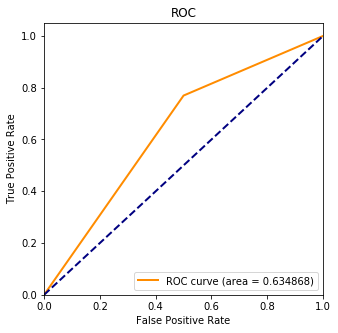

数据PIH的AUC为0.6348684210526316
-----------------------


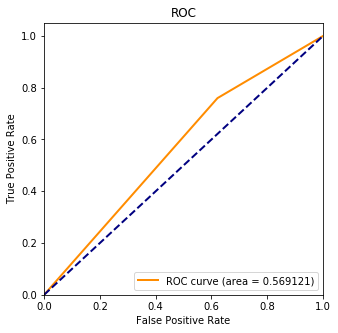

数据PREMATUR的AUC为0.5691205785545408
-----------------------


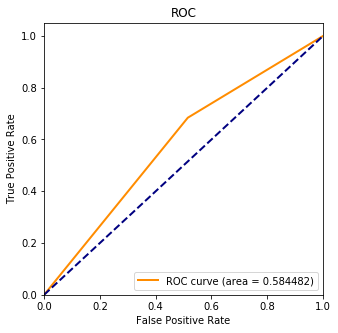

数据DISTRESS的AUC为0.5844820041570944
-----------------------


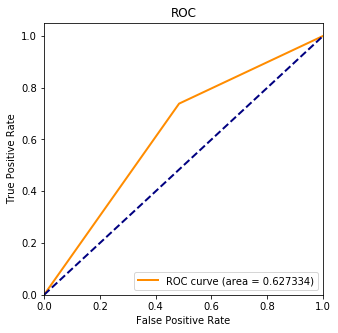

数据LGA的AUC为0.6273344651952462
-----------------------


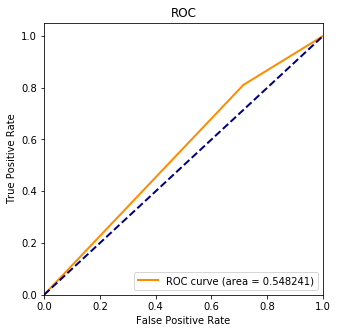

数据PDA的AUC为0.5482405033791657
-----------------------
***********************
AUC的平均值为 0.59280919
***********************


In [65]:
#SVM(二分类处理)
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import model_selection
import numpy as np
from sklearn import metrics
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)

def svm_train(train_X,test_X,train_y,test_y):
    """
    支持向量机
    svc二分类
    scr曲线你和函数回归
    kernel='linear'时，为线性核，C越大分类效果越好，但有可能会过拟合（defaul C=1）
    kernel='rbf'时（default），为高斯核，gamma值越小，分类界面越连续；gamma值越大，分类界面越“散”，分类效果越好，但有可能会过拟合。
    decision_function_shape='ovr'时，为one v rest，即一个类别与其他类别进行划分，
    decision_function_shape='ovo'时，为one v one，即将类别两两之间进行划分，用二分类的方法模拟多分类的结果。
    """
    clf = svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced')  #线性分类器
    #clf = svm.SVC(C = 0.8,kernel = 'rbf',gamma = 0.5,decision_function_shape = 'ovr',class_weight = 'balanced')#高斯核分类器
    #clf = svm.SVC(C = 0.08,kernel = 'poly',decision_function_shape = 'ovr',degree=8,class_weight = 'balanced')   #多项式核
    

    clf.fit(train_X,train_y)

    #计算准确率
    #print('训练集准确率：')
    #print(clf.score(train_X,train_y)) # 训练集准确率
    #print('测试集准确率:')
    #print(clf.score(test_X,test_y))  # 测试集准确率
    
    #计算F1
    pred = clf.predict(test_X)
    #print(i,'Precision',metrics.precision_score(y_test[i], pred))
    #print(i,'Recall',metrics.recall_score(y_test[i], pred))
    #print(i,'f1_score',metrics.f1_score(y_test[i], pred))
    #计算AUC
    #pred = [int(i) for i in pred ]
    fpr,tpr,thresholds = metrics.roc_curve(test_y,pred)
    #画图
    plt.figure(figsize = (5,5))
    plt.plot(fpr,tpr,color = 'darkorange',lw = 2,label = 'ROC curve (area = %2f)'%roc_auc_score(test_y,pred))
    plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc = 'lower right')
    plt.show()
    #print('AUC 的值为:',roc_auc_score(test_y,pred))
    return roc_auc_score(test_y,pred)
if __name__ == "__main__":
    y = y_2change_0(data_label[calRoc])
    #X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
    print('start...')
    a = 0
    b = 0
    for i in data_label.columns:
        if i in calRoc:
            if i == 'PIH' or i == 'PREECLAM':
                X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
                y_test = y_test[i]
                X_train, y_train = smo.fit_resample(X_train,y_train[i])
            elif i == 'PREMATUR': 
                X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
                y_test = y_test[i]
                X_train, y_train = smo.fit_resample(X_train,y_train[i])
            else:
                X_train,y_train,test_X,y_test = data_separate(data_attribute, y)
                y_test = y_test[i]
                X_train, y_train = smo.fit_resample(X_train,y_train[i])
            AUC = svm_train(X_train,test_X,y_train,y_test)
            
            print('数据{}的AUC为{}'.format(i,AUC))
            a = a + AUC
            b+=1
            print('-----------------------')

    print('***********************')
    print('AUC的平均值为 %.8f'%(float(a/b)))
    print('***********************')



In [66]:
print(data_label[calRoc].columns)

Index(['PIH', 'PREMATUR', 'DISTRESS', 'LGA', 'PDA'], dtype='object')


In [67]:
for i in y.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_smo, y_smo = smo.fit_resample(data_attribute2,y[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        elif i == 'PREMATUR':
            X_smo, y_smo = smo.fit_resample(data_attribute3,y[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
        else:
            X_smo, y_smo = smo.fit_resample(data_attribute,y[i])
            X_train,y_train,test_X,y_test = data_separate(X_smo, y_smo)
#改进前,注意需要下面加y[i]   
for i in y.columns:
    if i in calRoc:
        #训练模型计算AUC
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
        elif i == 'PREMATUR':
            X_train,y_train,test_X,y_test = data_separate(data_attribute,y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)

#### https://blog.csdn.net/qq_34105362/article/details/85693291  AUC值的问题
#### https://blog.csdn.net/zpalyq110/article/details/79527653   GBDT回归、分类等
#### https://zhuanlan.zhihu.com/p/290964953  Xgboost
#### https://www.cnblogs.com/pinard/p/11114748.html Xgboost模型以及参数
#### https://blog.csdn.net/AugustMe/article/details/96284556 Xgboost防止过拟合方法

[0]	validation_0-auc:0.603239
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.646586
[2]	validation_0-auc:0.701235
[3]	validation_0-auc:0.77581
[4]	validation_0-auc:0.745164
[5]	validation_0-auc:0.812631
[6]	validation_0-auc:0.802261
[7]	validation_0-auc:0.795036
[8]	validation_0-auc:0.785598
[9]	validation_0-auc:0.777907
[10]	validation_0-auc:0.774412
[11]	validation_0-auc:0.787229
[12]	validation_0-auc:0.78886
[13]	validation_0-auc:0.797716
[14]	validation_0-auc:0.812864
[15]	validation_0-auc:0.815894
[16]	validation_0-auc:0.808436
[17]	validation_0-auc:0.802843
[18]	validation_0-auc:0.784433
[19]	validation_0-auc:0.784199
[20]	validation_0-auc:0.795386
[21]	validation_0-auc:0.811466
[22]	validation_0-auc:0.800746
[23]	validation_0-auc:0.789793
[24]	validation_0-auc:0.79725
[25]	validation_0-auc:0.794454
[26]	validation_0-auc:0.78886
[27]	validation_0-auc:0.78117
[28]	validation_0-auc:0.776043
[29]	validation_0-auc:0.761827
[30]	validation_0-auc

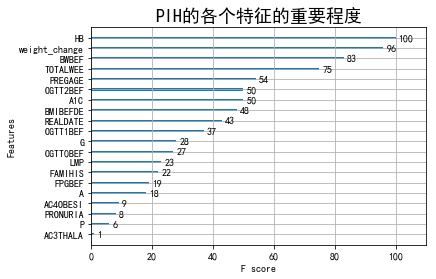

No handles with labels found to put in legend.


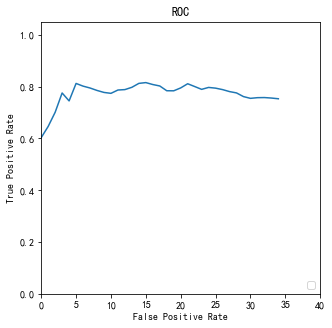

[0]	validation_0-auc:0.589873
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.662005
[2]	validation_0-auc:0.660354
[3]	validation_0-auc:0.650382
[4]	validation_0-auc:0.681915
[5]	validation_0-auc:0.677545
[6]	validation_0-auc:0.673886
[7]	validation_0-auc:0.694477
[8]	validation_0-auc:0.698815
[9]	validation_0-auc:0.697844
[10]	validation_0-auc:0.690398
[11]	validation_0-auc:0.704319
[12]	validation_0-auc:0.732161
[13]	validation_0-auc:0.737277
[14]	validation_0-auc:0.754694
[15]	validation_0-auc:0.762659
[16]	validation_0-auc:0.766187
[17]	validation_0-auc:0.757705
[18]	validation_0-auc:0.758417
[19]	validation_0-auc:0.763792
[20]	validation_0-auc:0.766641
[21]	validation_0-auc:0.767936
[22]	validation_0-auc:0.772404
[23]	validation_0-auc:0.774152
[24]	validation_0-auc:0.772404
[25]	validation_0-auc:0.769878
[26]	validation_0-auc:0.765087
[27]	validation_0-auc:0.770655
[28]	validation_0-auc:0.764374
[29]	validation_0-auc:0.758159
[30]	validation_

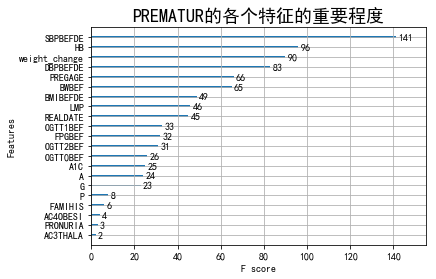

No handles with labels found to put in legend.


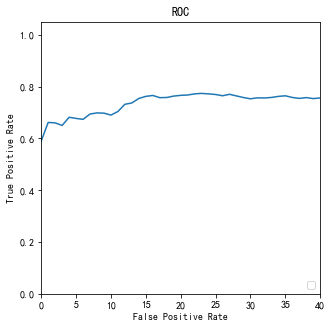

[0]	validation_0-auc:0.559561
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.574763
[2]	validation_0-auc:0.607404
[3]	validation_0-auc:0.612664
[4]	validation_0-auc:0.610355
[5]	validation_0-auc:0.619026
[6]	validation_0-auc:0.614551
[7]	validation_0-auc:0.622968
[8]	validation_0-auc:0.623609
[9]	validation_0-auc:0.622884
[10]	validation_0-auc:0.62708
[11]	validation_0-auc:0.631385
[12]	validation_0-auc:0.635062
[13]	validation_0-auc:0.631156
[14]	validation_0-auc:0.636586
[15]	validation_0-auc:0.639948
[16]	validation_0-auc:0.649103
[17]	validation_0-auc:0.6451
[18]	validation_0-auc:0.647917
[19]	validation_0-auc:0.65053
[20]	validation_0-auc:0.649429
[21]	validation_0-auc:0.653686
[22]	validation_0-auc:0.653783
[23]	validation_0-auc:0.6451
[24]	validation_0-auc:0.642512
[25]	validation_0-auc:0.641641
[26]	validation_0-auc:0.648486
[27]	validation_0-auc:0.645704
[28]	validation_0-auc:0.642899
[29]	validation_0-auc:0.643189
[30]	validation_0-auc:

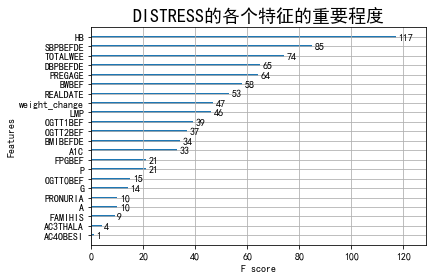

No handles with labels found to put in legend.


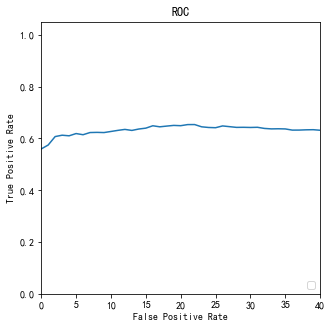

[0]	validation_0-auc:0.512203
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.563475
[2]	validation_0-auc:0.587542
[3]	validation_0-auc:0.615169
[4]	validation_0-auc:0.637966
[5]	validation_0-auc:0.681243
[6]	validation_0-auc:0.666949
[7]	validation_0-auc:0.643701
[8]	validation_0-auc:0.649604
[9]	validation_0-auc:0.647373
[10]	validation_0-auc:0.639096
[11]	validation_0-auc:0.630904
[12]	validation_0-auc:0.638079
[13]	validation_0-auc:0.641525
[14]	validation_0-auc:0.651667
[15]	validation_0-auc:0.643136
[16]	validation_0-auc:0.64435
[17]	validation_0-auc:0.640339
[18]	validation_0-auc:0.642938
[19]	validation_0-auc:0.651525
[20]	validation_0-auc:0.65339
[21]	validation_0-auc:0.644407
[22]	validation_0-auc:0.640847
[23]	validation_0-auc:0.636949
[24]	validation_0-auc:0.636271
[25]	validation_0-auc:0.626836
Stopping. Best iteration:
[5]	validation_0-auc:0.681243

LGA的AUC为{'validation_0': {'auc': [0.512203, 0.563475, 0.587542, 0.615169, 0.637966, 0

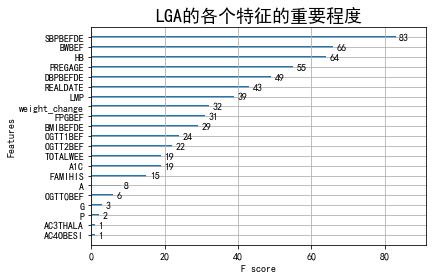

No handles with labels found to put in legend.


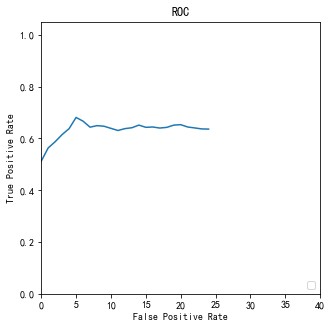

[0]	validation_0-auc:0.493197
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.499098
[2]	validation_0-auc:0.59041
[3]	validation_0-auc:0.557951
[4]	validation_0-auc:0.572213
[5]	validation_0-auc:0.590164
[6]	validation_0-auc:0.660082
[7]	validation_0-auc:0.653525
[8]	validation_0-auc:0.63623
[9]	validation_0-auc:0.64082
[10]	validation_0-auc:0.639016
[11]	validation_0-auc:0.658852
[12]	validation_0-auc:0.660902
[13]	validation_0-auc:0.656967
[14]	validation_0-auc:0.653689
[15]	validation_0-auc:0.647131
[16]	validation_0-auc:0.648771
[17]	validation_0-auc:0.639918
[18]	validation_0-auc:0.654672
[19]	validation_0-auc:0.662049
[20]	validation_0-auc:0.659262
[21]	validation_0-auc:0.657459
[22]	validation_0-auc:0.651393
[23]	validation_0-auc:0.644344
[24]	validation_0-auc:0.628852
[25]	validation_0-auc:0.622295
[26]	validation_0-auc:0.614918
[27]	validation_0-auc:0.627213
[28]	validation_0-auc:0.619836
[29]	validation_0-auc:0.617705
[30]	validation_0-a

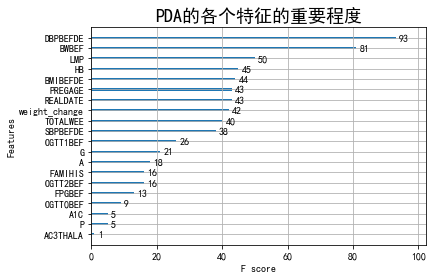

No handles with labels found to put in legend.


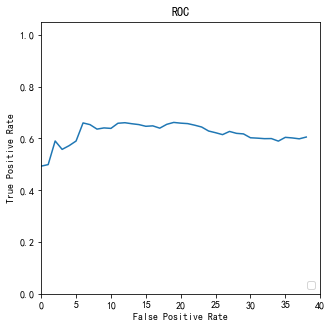

In [68]:
#集成学习
#Xgboost
import xgboost as  xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)

X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)
clf = xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=200,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=0,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        missing=None)
clf_xg = clf

y_test_0_1 = y_2change_0(y)
for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        clf.fit(X_train, y_train,early_stopping_rounds=20,   #如果模型的loss20次内没有减小，则提前结束模型训练
                eval_set=[(test_X, y_test)],  #例如，当正负样本比例为1:10时，scale_pos_weight=10
                eval_metric='auc',       #校验数据所需要的评价指标
                verbose=True
                )

        
        evals_result = clf.evals_result()    #字典，存储在watchlist中的元素的评估结果
        print('{}的AUC为{}'.format(i,evals_result))  
        #print('metrics得到的auc为{}'.format(roc_auc_score(y_test[i],pred)))
        print(clf.feature_importances_)    #特征重要性
        plot_importance(clf,max_num_features=24)
        plt.title("{}的各个特征的重要程度".format(i),fontsize = 18)
        plt.rcParams['font.sans-serif']=['SimHei']
        plt.show()
        
        #画ROC变化趋势曲线
        #pred = clf.predict(test_X)
        #y_test_hot = label_binarize(y_test[i],classes =(0, 1))
        #fpr,tpr,thresholds = metrics.roc_curve(y_test[i],pred)
        plt.figure(figsize = (5,5))
        #Xgbc_auc = roc_auc_score(y_test[i],pred)
        plt.plot([i for i in range(len(list(evals_result['validation_0']['auc'])))],list(evals_result['validation_0']['auc']))
        #plt.plot([0,1],[0,1],color = 'navy',lw = 2,linestyle = '--')
        plt.xlim([0,40])
        plt.ylim([0,1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC')
        plt.legend(loc = 'lower right')
        plt.show()

In [69]:
#print(evals_result)
#print(type(evals_result['validation_0']['auc']))
#x_y_auc = list(enumerate(evals_result['validation_0']['auc'],start = 1))
#print(x_y_auc)
#print(list(evals_result['validation_0']['auc']))
X = [i for i in range(len(list(evals_result['validation_0']['auc'])))]
print(X)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]


In [70]:
#网格暴力搜索
from sklearn.model_selection import GridSearchCV
import numpy as np
import xgboost as xgb

X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)

clf1 = xgb.XGBClassifier(max_depth=5,min_child_weight=1
                    )
#设定网格搜索的xgboost参数搜索范围，值搜索XGBoost的主要6个参数
param_dist = {
        'learning_rate':np.linspace(0.1,1,5),
        'subsample':np.linspace(0.7,0.9,5),
        'colsample_bytree':np.linspace(0.5,0.98,5),
        'n_estimators':np.linspace(100,500,5)
        }

#GridSearchCV参数说明，clf1设置训练的学习器
#param_dist字典类型，放入参数搜索范围
#scoring = 'roc_auc'，精度评价方式设定为“roc_auc“
#n_iter=300，训练300次，数值越大，获得的参数精度越大，但是搜索时间越长
#n_jobs = -1，使用所有的CPU进行训练，默认为1，使用1个CPU
grid = GridSearchCV(clf1,param_dist,cv = 3,scoring = 'roc_auc',n_jobs = 1)
  
#在训练集上训练
for i in y.columns:
    if i in calRoc:
        grid.fit(X_train,np.ravel(y_train[i]))
        #返回最优的训练器
        best_estimator = grid.best_estimator_
        print(best_estimator)
        #输出最优训练器的精度




/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/Users/a10.11.5/anaconda3/lib/python3.7/site-packages/xgboost/training.py", line 62, in _train_internal
    for i in range(start_iteration, num_boost_round):
TypeError: 'numpy.float64' object cannot be interpreted as an integer

  FitFailedWarning)
/Users/a10.11.5/anaconda3

TypeError: 'numpy.float64' object cannot be interpreted as an integer

#### XGBClassifier(colsample_bytree=0.86, learning_rate=2.0, max_depth=2,min_child_weight=4, n_estimators=78, subsample=0.7)
#### XGBClassifier(colsample_bytree=0.86, learning_rate=2.0, max_depth=2,min_child_weight=4, n_estimators=50, subsample=0.8)
#### XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, min_child_weight=4,n_estimators=58, subsample=0.7)
#### XGBClassifier(colsample_bytree=0.74, learning_rate=2.0, max_depth=4,min_child_weight=2, n_estimators=54, subsample=0.75)
#### XGBClassifier(colsample_bytree=0.74, learning_rate=0.5075, min_child_weight=3,n_estimators=50, subsample=0.9

In [ ]:
#随机森林
from sklearn import linear_model,ensemble
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
import matplotlib.pyplot as plt
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.4,random_state=42)
#随机森林
forest = ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

clf_forest = forest
#X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)

for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        forest.fit(X_train, y_train)
        forest_y_score=forest.predict_proba(test_X)
        y_test_hot = label_binarize(y_test,classes =(0, 1))
        forest_fpr,forest_tpr,forest_threasholds=metrics.roc_curve(y_test_hot.ravel(),forest_y_score[:,1].ravel()) # 计算ROC的值
        forest_auc=metrics.auc(forest_fpr,forest_tpr) #Gbdt_auc值
        print("对于{}属性的AUC：{}".format(i,forest_auc))
        
        #利用属性重要性画图
        importances = forest.feature_importances_
        print("对于{}属性的重要性：".format(i))
        x_columns = X_train.columns
        indices = np.argsort(importances)[::-1]    #np.argsort从小到大排序提取索引,[::-1]从后向前取
        
        new_columns = []
        for f in range(X_train.shape[1]):
            #%-*s 代表输入一个字符串，-号代表左对齐、后补空白，*号代表对齐宽度由输入时确定,30是空白数
            print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))   
            new_columns.append(x_columns[indices[f]])

        plt.figure(figsize=(10,6))
        plt.title("{}的各个特征的重要程度".format(i),fontsize = 18)
        plt.ylabel("import level",fontsize = 15,rotation=90)
        plt.rcParams['font.sans-serif'] = ["SimHei"]     ##设置字体为SimHei显示中文
        plt.rcParams['axes.unicode_minus'] = False       #设置正常显示字符
        for i in range(x_columns.shape[0]):
            plt.bar(i,importances[indices[i]],color='orange',align='center')  #i代表条形位置,importance代表高度
            plt.xticks(np.arange(x_columns.shape[0]),new_columns,rotation=90,fontsize=15)
        plt.show()
        
        

In [ ]:
#无SMOOTE的随机森林
#随机森林
from sklearn import linear_model,ensemble
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
import matplotlib.pyplot as plt

#随机森林
forest = ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#X_train,y_train,X_test,y_test = data_separate(data_attribute_N1,y)

for i in y.columns:
    if i in calRoc:
        #训练模型计算AUC
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2,y)
        elif i == 'PREMATUR':
            X_train,y_train,test_X,y_test = data_separate(data_attribute,y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute_N1,y)
        forest.fit(X_train, y_train[i])
        forest_y_score=forest.predict_proba(test_X)
        y_test_hot = label_binarize(y_test[i],classes =(0, 1))
        forest_fpr,forest_tpr,forest_threasholds=metrics.roc_curve(y_test_hot.ravel(),forest_y_score[:,1].ravel()) # 计算ROC的值
        forest_auc=metrics.auc(forest_fpr,forest_tpr) #Gbdt_auc值
        print("对于{}属性的AUC：{}".format(i,forest_auc))
        
        #利用属性重要性画图
        importances = forest.feature_importances_
        print("对于{}属性的重要性：".format(i))
        x_columns = X_train.columns
        indices = np.argsort(importances)[::-1]    #np.argsort从小到大排序提取索引,[::-1]从后向前取
        
        new_columns = []
        for f in range(X_train.shape[1]):
            #%-*s 代表输入一个字符串，-号代表左对齐、后补空白，*号代表对齐宽度由输入时确定,30是空白数
            print("%2d) %-*s %f" % (f + 1, 30, x_columns[indices[f]], importances[indices[f]]))   
            new_columns.append(x_columns[indices[f]])

        plt.figure(figsize=(10,6))
        plt.title("{}的各个特征的重要程度".format(i),fontsize = 18)
        plt.ylabel("import level",fontsize = 15,rotation=90)
        plt.rcParams['font.sans-serif'] = ["SimHei"]     ##设置字体为SimHei显示中文
        plt.rcParams['axes.unicode_minus'] = False       #设置正常显示字符
        for i in range(x_columns.shape[0]):
            plt.bar(i,importances[indices[i]],color='orange',align='center')  #i代表条形位置,importance代表高度
            plt.xticks(np.arange(x_columns.shape[0]),new_columns,rotation=90,fontsize=15)
        plt.show()

In [ ]:
print(X_train.shape[1])
print(indices.shape)

In [ ]:
#网格暴力搜索
from sklearn.model_selection import GridSearchCV

clf2 = ensemble.RandomForestClassifier(random_state=0)
param_dist = {
    'n_estimators':range(100,300,50),
    'min_samples_split':range(1,5,1),
    'min_samples_leaf':range(1,5,1)
    
}
grid = GridSearchCV(clf2,param_dist,scoring = 'roc_auc',n_jobs = 2)
#在训练集上训练
for i in y.columns:
    if i in calRoc:
        grid.fit(X_train,np.ravel(y_train[i]))
        #返回最优的训练器
        best_estimator = grid.best_estimator_
        print(best_estimator)
        #输出最优训练器的精度

In [ ]:
print(indices)

In [ ]:
#SMOTE的stackiing融合
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy= 1,random_state=42)

for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, y)
            y_test = y_test[i]
            X_train, y_train = smo.fit_resample(X_train,y_train[i])
        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_train = np.array(X_train)
        y_train = np.array(y_train)
        X_test = np.array(test_X)
        y_test = np.array(y_test)
#定义第一层模型   
### 第一层模型
        clfs = [ svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto'),
               xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=200,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=0,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        ),
               ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),

        ]
        X_train_stack  = np.zeros((X_train.shape[0], len(clfs)))   #(1548,3)
        X_test_stack = np.zeros((X_test.shape[0], len(clfs)))      #(517,3)

#数据输入第一层模型，输出即将喂给第二层模型特征
### 3折stacking
        n_folds = 3
        skf = StratifiedKFold(n_splits=n_folds, random_state=1,shuffle=True)
        for index,clf in enumerate(clfs):
        #     print("分类器：{}".format(clf))
            X_stack_test_n = np.zeros((X_test.shape[0], n_folds))    #(517,3)
            
#             X_train = X_train.values
#             X_test = X_test.values
#             y_train = y_train.values
#             y_test = y_test.values
            for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)): #skf.split返回训练集、验证集的索引,几折就几次
                tr_x = X_train[train_index]  #1032
                tr_y = y_train[train_index]  #1032
                clf.fit(tr_x,tr_y)
                #生成stacking训练数据集
                X_train_stack [test_index, index] = clf.predict_proba(X_train[test_index])[:,1]  #test_index:516   index:0,1,2
                X_stack_test_n[:,j] = clf.predict_proba(X_test)[:,1]
                #生成stacking测试数据集
            X_test_stack[:,index] = X_stack_test_n.mean(axis=1)
        ###第二层模型LR
        clf_second = LogisticRegression(solver="lbfgs")
        clf_second.fit(X_train_stack,y_train)
        pred = clf_second.predict_proba(X_test_stack)[:,1]
        print('AUC为{}'.format(roc_auc_score(y_test,pred)))#0.9946

In [ ]:
#无SMOTE的stacking
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBDT
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as ADA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import numpy as np
#使用imlbearn库中上采样方法中的SMOTE接口
from imblearn.over_sampling import SMOTE
from collections import Counter
#定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(sampling_strategy=0.3,random_state=42)

for i in data_label.columns:
    if i in calRoc:
        if i == 'PIH' or i == 'PREECLAM':
            X_train,y_train,test_X,y_test = data_separate(data_attribute2, y)
        elif i == 'PREMATUR': 
            X_train,y_train,test_X,y_test = data_separate(data_attribute3, y)
        else:
            X_train,y_train,test_X,y_test = data_separate(data_attribute, y)

        X_train = X_train.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        X_train = np.array(X_train)
        y_train = np.array(y_train[i])
        X_test = np.array(test_X)
        y_test = np.array(y_test[i])
#定义第一层模型   
### 第一层模型
        clfs = [ svm.SVC(C = 0.08,kernel = 'linear',decision_function_shape = 'ovr',class_weight = 'balanced',probability=True,gamma='auto'),
               xgb.XGBClassifier(max_depth=5,         #树的最大深度
                        learning_rate=0.1, 
                        n_estimators=200,     #决策树的棵树，即总共迭代的次数
                        silent=True, 
                        objective='binary:logistic', 
                        nthread=1,   #最大线程数
                        gamma=0,      #gamma 给定了所需的最低loss function的值
                        min_child_weight=1,    #孩子节点中最小的样本权重和，在现行回归模型中，这个参数是指建立每个模型所需要的最小样本数
                        max_delta_step=0,   #使得xgboost更新过程更加保守，但在使用logistics 回归时，若类别极度不平衡，则调整该参数可能有效果
                        subsample=0.85,     #用于训练模型的子样本占整个样本集合的比例
                        colsample_bytree=0.6,    #在建立树时对特征随机采样的比例
                        colsample_bylevel=1,     #决定每次节点划分时子样例的比例
                        reg_alpha=0,            #L1 正则的惩罚系数，当数据维度极高时可以使用，使得算法运行更快
                        reg_lambda=1,            #L2 正则的惩罚系数，用于处理XGBoost的正则化部分。通常不使用，但可以用来降低过拟合
                        scale_pos_weight=3,      #大于0的取值可以处理类别不平衡的情况。例如，当正负样本比例为1:10时，scale_pos_weight=10
                        seed=1440,             #校验数据所需要的评价指标
                        ),
               ensemble.RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1),

        ]
        X_train_stack  = np.zeros((X_train.shape[0], len(clfs)))   #(1548,3)
        X_test_stack = np.zeros((X_test.shape[0], len(clfs)))      #(517,3)

#数据输入第一层模型，输出即将喂给第二层模型特征
### 3折stacking
        n_folds = 3
        skf = StratifiedKFold(n_splits=n_folds, random_state=1,shuffle=True)
        for index,clf in enumerate(clfs):
        #     print("分类器：{}".format(clf))
            X_stack_test_n = np.zeros((X_test.shape[0], n_folds))    #(517,3)
            
#             X_train = X_train.values
#             X_test = X_test.values
#             y_train = y_train.values
#             y_test = y_test.values
            for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)): #skf.split返回训练集、验证集的索引,几折就几次
                tr_x = X_train[train_index]  #1032
                tr_y = y_train[train_index]  #1032
                clf.fit(tr_x,tr_y)
                #生成stacking训练数据集
                X_train_stack [test_index, index] = clf.predict_proba(X_train[test_index])[:,1]  #test_index:516   index:0,1,2
                X_stack_test_n[:,j] = clf.predict_proba(X_test)[:,1]
                #生成stacking测试数据集
            X_test_stack[:,index] = X_stack_test_n.mean(axis=1)
        ###第二层模型LR
        clf_second = LogisticRegression(solver="lbfgs")
        clf_second.fit(X_train_stack,y_train)
        pred = clf_second.predict_proba(X_test_stack)[:,1]
        print('AUC为{}'.format(roc_auc_score(y_test,pred)))#0.9946

In [ ]:
#for j,(train_index,test_index) in enumerate(skf.split(X_train,y_train)):
    #print(j,(train_index.shape,test_index.shape)) 
#0 ((1032,), (516,))
#1 ((1032,), (516,))
#2 ((1032,), (516,))
#print(clf.predict_proba(X_train[test_index])[:,1].shape)  #945

#print(np.zeros((X_test.shape[0], n_folds)).shape)   #(517,3)
#print(X_test.shape)   #(517,24)
print(clf.predict_proba(X_train[test_index]).shape)   #945,2
print(X_test.shape)
#print(X_smo.shape, y_smo.shape)   #(4050,22)

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns
#画热力图
'''
def correlation_heatmap(data_attribute_N1):
    data_attribute_N1 = data_attribute_N1.copy(deep = True)
    correlations = data_del.corr()
    fig,ax = plt.subplots(figsize = (50,50))
    sns.heatmap(correlations,vmax = 1.0,center = 0,fmt = '.2f',
               square = True,linewidths = .8,annot = True,cbar_kws = {"shrink":.70})
    pyplot.show()
correlation_heatmap(data_attribute_N1)
'''
data_del = data_del.copy(deep = True)
#PCA降维
def pca(train_y,topNfeat = 60):
    meanValues = np.mean(data_del,axis = 0)# 竖着求平均值，数据格式是m×n
    meanRemoved = data_del - meanValues # 0均值化  m×n维
    covMat = np.cov(meanRemoved,rowvar = 0)# 每一列作为一个独立变量求协方差  n×n维
    eigVals,eigVects = np.linalg.eig(np.mat(covMat)) # 求特征值和特征向量  eigVects是n×n维
    eigValInd = np.argsort(-eigVals)# 特征值由大到小排序，eigValInd十个arrary数组 1×n维
    eigValInd = eigValInd[:int(topNfeat)]# 选取前topNfeat个特征值的序号  1×r维
    redEigVects = eigVects[:int(eigValInd)]# 把符合条件的几列特征筛选出来组成P  n×r维
    lowDDataMat = meanRemoved*redEigVects # 矩阵点乘筛选的特征向量矩阵  m×r维 公式Y=X*P
    reconMat = (lowDDataMat*redEigVects.T) + meanValues# 转换新空间的数据  m×n维
    return lowDDataMat,reconMat
def drawPoints(dataset1,dataset2):# 画图，dataset1是没降维的数据，dataset2是数据映射到新空间的数据
    fig = pyplot.figure()
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    ax1.scatter(dataset1[:,0],dataset1[:,1],marker = 's',s=40,color = 'red')
    dataset2 = array(dataset2)
    ax2.scatter(dataset2[:,0],dataset2[:,1],s=40,color='blue')
    plt.show()
if __name__ == '__main__':
    data = data_attribute_N1
    proccess_data, reconMat = pca(data,1)
    drawPoints(data,reconMat)